In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import os
import glob
import scipy as sc
%matplotlib inline

In [2]:
Path="/media/ilker/Ilker/PMT_Characterization/with_light_FW46_FS9_1100/tube_withteflon/10k"
files = glob.glob(Path,recursive=True)

In [3]:
gain = lambda Wb,R,NPE,e:Wb/(NPE*e*R)

def getValues(files,nFiles=-1):
    theone={}
    EventCount=1
    PointCount=1
    FileCount=0
    for k in files:
        values={}
        with open(k) as f:
            lines=f.readlines()
            info={}
            for line in lines:
                splitline=line.strip().split(",")
                if(splitline[0]=="Segments"):
                    info[splitline[0]]=int(splitline[1])
                    info[splitline[2]]=int(splitline[3])
                    continue

                if("Time" in values.keys()):
                    values["Time"]=np.append(values["Time"],float(splitline[0]))
                    values["Ampl"]=np.append(values["Ampl"],float(splitline[1]))
                    
                    if(PointCount==info["SegmentSize"]):
                        theone[EventCount]=values.copy()
                        
                        values["Time"]=np.array([])
                        values["Ampl"]=np.array([])
                        EventCount+=1
                        PointCount=0
                    
                    PointCount+=1
                else:
                    if (splitline[0]=="Time"):
                        values["Time"]=np.array([])
                        values["Ampl"]=np.array([])
                        
                        print(f"Collecting data from {FileCount} ")
                    continue;    
                    
        FileCount+=1
        f.close()
        if(nFiles==FileCount): 
            break

    return theone

def Histogram(data,xlabel,ylabel,title,figsize=(12,8),dpi=300,bins=3):
    plt.figure(figsize=figsize,dpi=dpi)
    plt.hist(data,bins=bins)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
def WriteToFile(x,y,txtfile):
    with open(txtfile,"w") as f:
        for i in range(0,len(x)):
            s=str(x[i]) + " " +str(y[i]) +"\n"
            f.write(s)

def getArea(pmt,xlow,xhigh,minpulse=9999,p=True):
 
    ### This is for removing DC offset
    MaskTime=pmt["Time"]<=xlow
    DataNoOffset=pmt["Ampl"]-st.mean(pmt["Ampl"][MaskTime])
    datamin=np.min(DataNoOffset)
    if(datamin>=minpulse and minpulse!=9999): return -1
    
    if(p):
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(pmt["Time"],DataNoOffset,label="Signal DC-removed")
        plt.plot(pmt["Time"],pmt["Ampl"],label="Signal")
        plt.axvline(xlow)
        plt.axvline(xhigh)
        plt.legend()
        plt.show()

    DataMask=np.where(np.logical_and(pmt["Time"]>=xlow,pmt["Time"]<=xhigh))
    x=pmt["Time"][DataMask]
    y=DataNoOffset[DataMask]
    
    if(p):
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(x,y)
        plt.show()
        
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(pmt["Time"],DataNoOffset)
        plt.show()

    dt=pmt["Time"][DataMask][1:]-pmt["Time"][DataMask][:-1]
    area=np.trapz(DataNoOffset[DataMask],dx=dt)
    g=gain(area,50,1,1.62e-19)
    return area,g

def MultiAreaGain(data,xlow,xhigh,minpulse,p=False):
    area=np.array([])
    gain=np.array([])
    for key in data:
        result=getArea(data[key],xlow,xhigh,minpulse=minpulse,p=p)
        if(result!=-1):
            area=np.append(area,result[0])
            gain=np.append(gain,result[1])
    values=np.array([area,gain])
    
    return values
def ListofFiles(path,ch):
    filelist=[]
    for root, dirs, files in os.walk(path):
        for file in files:
             if(file[:2]==ch):
                filelist.append(os.path.join(root,file))
    return filelist

def PickleITDump(data,fileName):
    with open(fileName,'wb') as f:
        pickle.dump(data,f)
        
def PickleITRead(fileName):
    
    with open(fileName,'rb') as f:
        data=pickle.load(f)
    return data

def getPulseHeight(pmt,xlow,xhigh,minpulse=9999,p=True):
 
    ### This is for removing DC offset
    MaskTime=pmt["Time"]<=xlow
    DataNoOffset=pmt["Ampl"]-st.mean(pmt["Ampl"][MaskTime])
    datamin=np.min(DataNoOffset)
    if(datamin>=minpulse and minpulse!=9999): return -1
    
    if(p):
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(pmt["Time"],DataNoOffset,label="Signal DC-removed")
        plt.plot(pmt["Time"],pmt["Ampl"],label="Signal")
        plt.axvline(xlow)
        plt.axvline(xhigh)
        plt.legend()
        plt.show()

    DataMask=np.where(np.logical_and(pmt["Time"]>=xlow,pmt["Time"]<=xhigh))
    x=pmt["Time"][DataMask]
    y=DataNoOffset[DataMask]
    
    if(p):
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(x,y)
        plt.show()

    dt=pmt["Time"][DataMask][1:]-pmt["Time"][DataMask][:-1]
    pulseheightGate=np.min(DataNoOffset[DataMask])
    pulseheight=np.min(DataNoOffset)

    return pulseheight,pulseheightGate

def MultiPulseHeightDist(data,xlow,xhigh,minpulse,p=False):
    pulseheightGate=np.array([])
    pulseheight=np.array([])
    for key in data:
        result=getPulseHe1.62e-19*50)ight(data[key],xlow,xhigh,minpulse=minpulse,p=p)
        if(result!=-1):
            pulseheight=np.append(pulseheight,result[0])
            pulseheightGate=np.append(pulseheightGate,result[1])
    values=np.array([pulseheight,pulseheightGate])
    
    return values
def HistIT(data,title,b,xlabel,xline=1e-3,log=False):
    plt.figure(figsize=(12,8),dpi=300)
    plt.title(title)
    plt.ylabel("Number of Events")
    plt.xlabel(xlabel)
    plt.hist(data,bins=b)
    plt.axvline(xline,color="r")
    if(log):
        plt.semilogy()
    mean=st.mean(data)
    stdev=st.stdev(data)
    
    print(f"mean = {mean} stdev = {stdev}")
def HistAreandGain(data,title,b):
    plt.figure(figsize=(12,8),dpi=300)
    plt.title(title+" Gain")
    plt.ylabel("Number of Events")
    plt.xlabel("Gain")
    plt.hist(data[1],bins=b)
    plt.semilogx()
    mean=st.mean(data[1])
    stdev=st.stdev(data[1])
    print(f"Gain mean = {mean} stdev = {stdev}")
    
    plt.figure(figsize=(12,8),dpi=300)
    plt.title(title+" Area")
    plt.ylabel("Number of Events")
    plt.xlabel("Area(wb)")
    plt.hist(data[0],bins=b)
    plt.semilogx()
    mean=st.mean(data[0])
    stdev=st.stdev(data[0])
    print(f"Area mean = {mean} stdev = {stdev}")
    
    

def getActualPulseHeight(pmt,minpulse=9999,p=True):
 

    datamin=np.min(pmt["Ampl"])
    if(datamin>=minpulse and minpulse!=9999): return -1
    
    if(p):
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(pmt["Time"],pmt["Ampl"],label="Signal")
        plt.axvline(xlow)
        plt.axvline(xhigh)
        plt.legend()
        plt.show()

    x=pmt["Time"]
    y=pmt["Ampl"]
    
    if(p):
        plt.figure(figsize=(12,8),dpi=300)
        plt.plot(x,y)
        plt.show()

    dt=pmt["Time"][1:]-pmt["Time"][:-1]
    pulseheightGate=np.min(pmt["Ampl"])
    pulseheight=np.min(pmt["Ampl"])

    return pulseheight,pulseheightGate

def ActualMultiPulseHeightDist(data,minpulse,p=False):
    pulseheightGate=np.array([])
    pulseheight=np.array([])
    for key in data:
        result=getActualPulseHeight(data[key],minpulse=minpulse,p=p)
        if(result!=-1):
            pulseheight=np.append(pulseheight,result[0])
            pulseheightGate=np.append(pulseheightGate,result[1])
    values=np.array([pulseheight,pulseheightGate])
    return values

def LogNormFit(data,title):
    fig, ax = plt.subplots(1, 1)
    plt.title(title+"_logNorm")
    plt.ylabel("Number of Events")
    plt.xlabel("Gain")
    dataMask=data>1
    data=data[dataMask]
    x=np.log(data)
    print(min(x))
    print(max(x))
    mean=np.exp(st.mean(x))
    stdev=np.exp(st.stdev(x))
    plt.hist(x,bins=100,density=True,stacked=True)
    plt.show()
    ### Prepare the Fit
    fitting_params_lognormal = sc.stats.lognorm.fit(data, floc=0, scale=mean)
    lognorm_dist_fitted = sc.stats.lognorm(*fitting_params_lognormal)
    lognorm_dist = sc.stats.lognorm(s=stdev, loc=0, scale=mean)
    t=np.linspace(np.min(data),np.max(data),100)
    print(f"Area mean = {mean} stdev = {stdev}")
    plt.figure(figsize=(12,8),dpi=300)
    plt.title(title)
    plt.ylabel("Number of Events")
    plt.xlabel("PE")
    plt.hist(data,bins=100,density=True,stacked=True,label="data")
    plt.plot(t,lognorm_dist_fitted.pdf(t),lw=2,color='r',label="Fit")
    plt.legend()
    plt.show()
    

In [4]:
#Pmt1Files10k_1200=ListofFiles("/media/ilker/Ilker/PMT_Characterization/with_light_FW46_FS9_1200/tube_withteflon/10k","C4")
#Pmt3Files10k_1200=ListofFiles("/media/ilker/Ilker/PMT_Characterization_06302022/tube3/1200_FW43_FS9_0dBamp_0dBscope_1hour/10k","C2")


In [5]:
#PMT1=getValues(Pmt1Files10k_1200,nFiles=-1)
#PMT3=getValues(Pmt3Files10k_1200,nFiles=-1)

In [6]:
#PickleITDump(PMT1,"/media/ilker/Ilker/PMT_Characterization/PickleScope/PMT1_10k_46_1200V.p")
#PickleITDump(PMT3,"/media/ilker/Ilker/PMT_Characterization/PickleScope/PMT3_10k_43_1200V.p")

In [7]:
PMT1_10k_1200=PickleITRead("/media/ilker/Ilker/PMT_Characterization/PickleScope/PMT1_10k_46_1200V.p")
PMT3_10k_1200=PickleITRead("/media/ilker/Ilker/PMT_Characterization/PickleScope/PMT3_10k_43_1200V.p")

25000


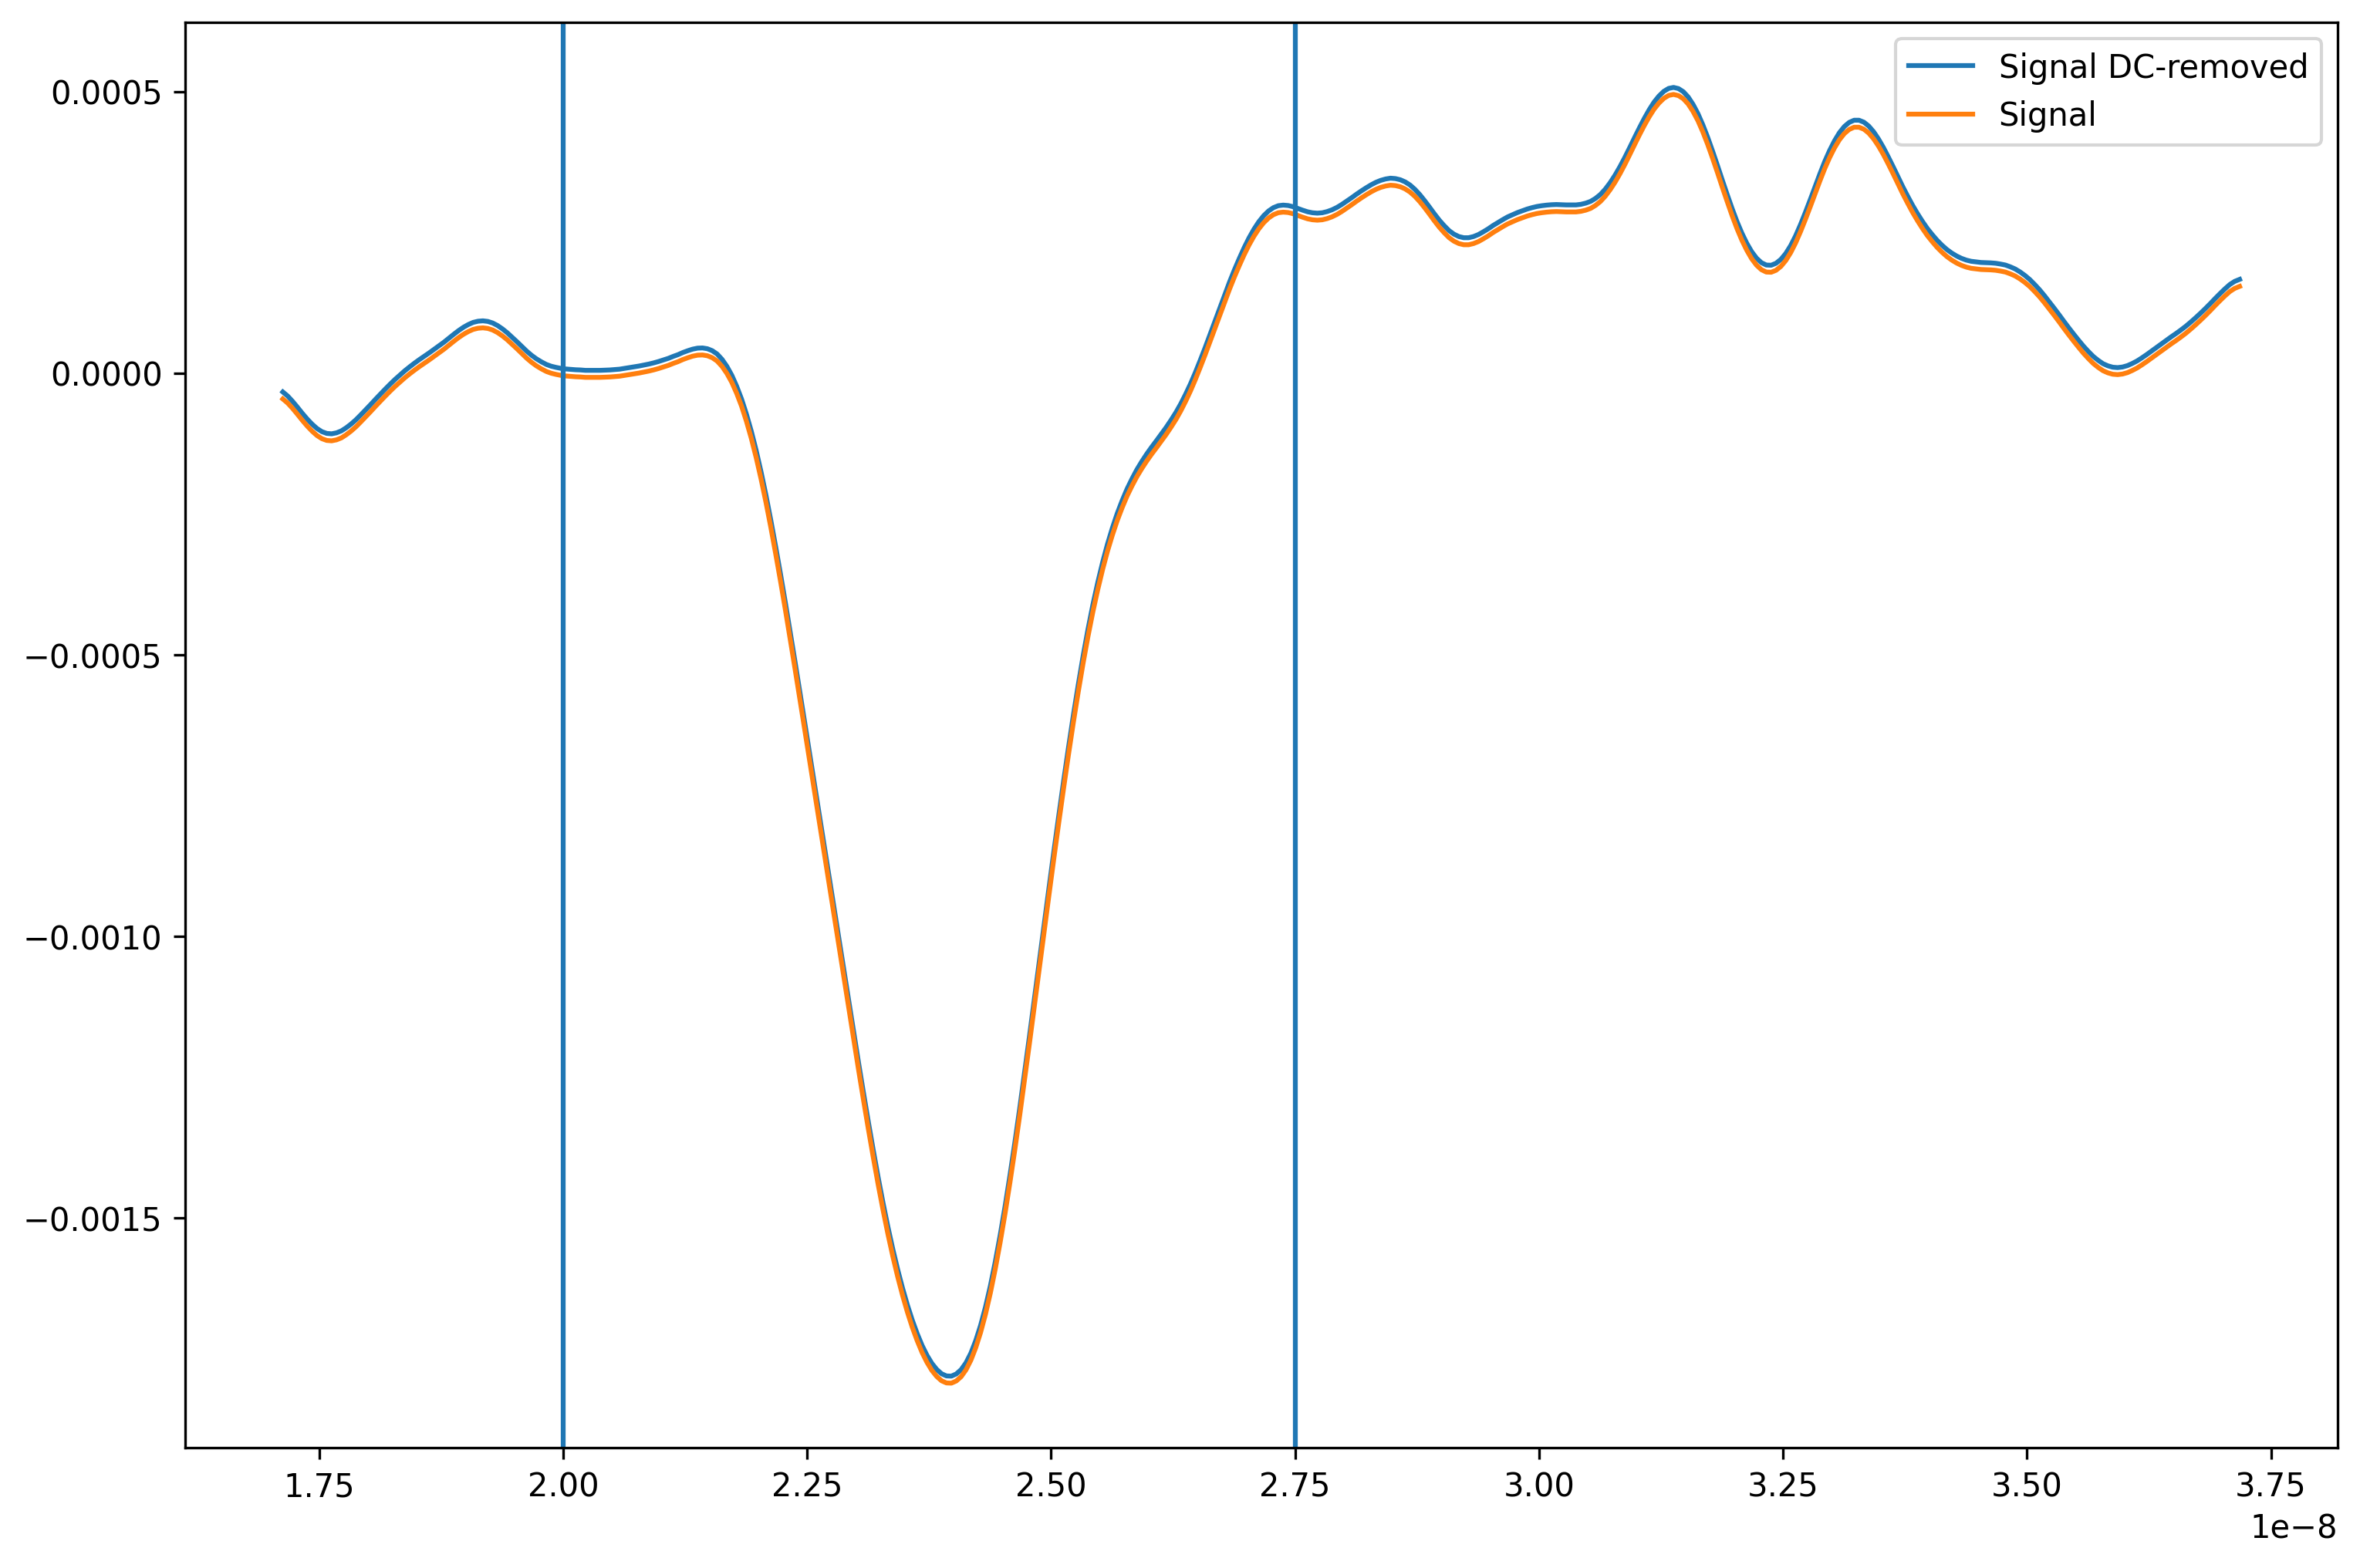

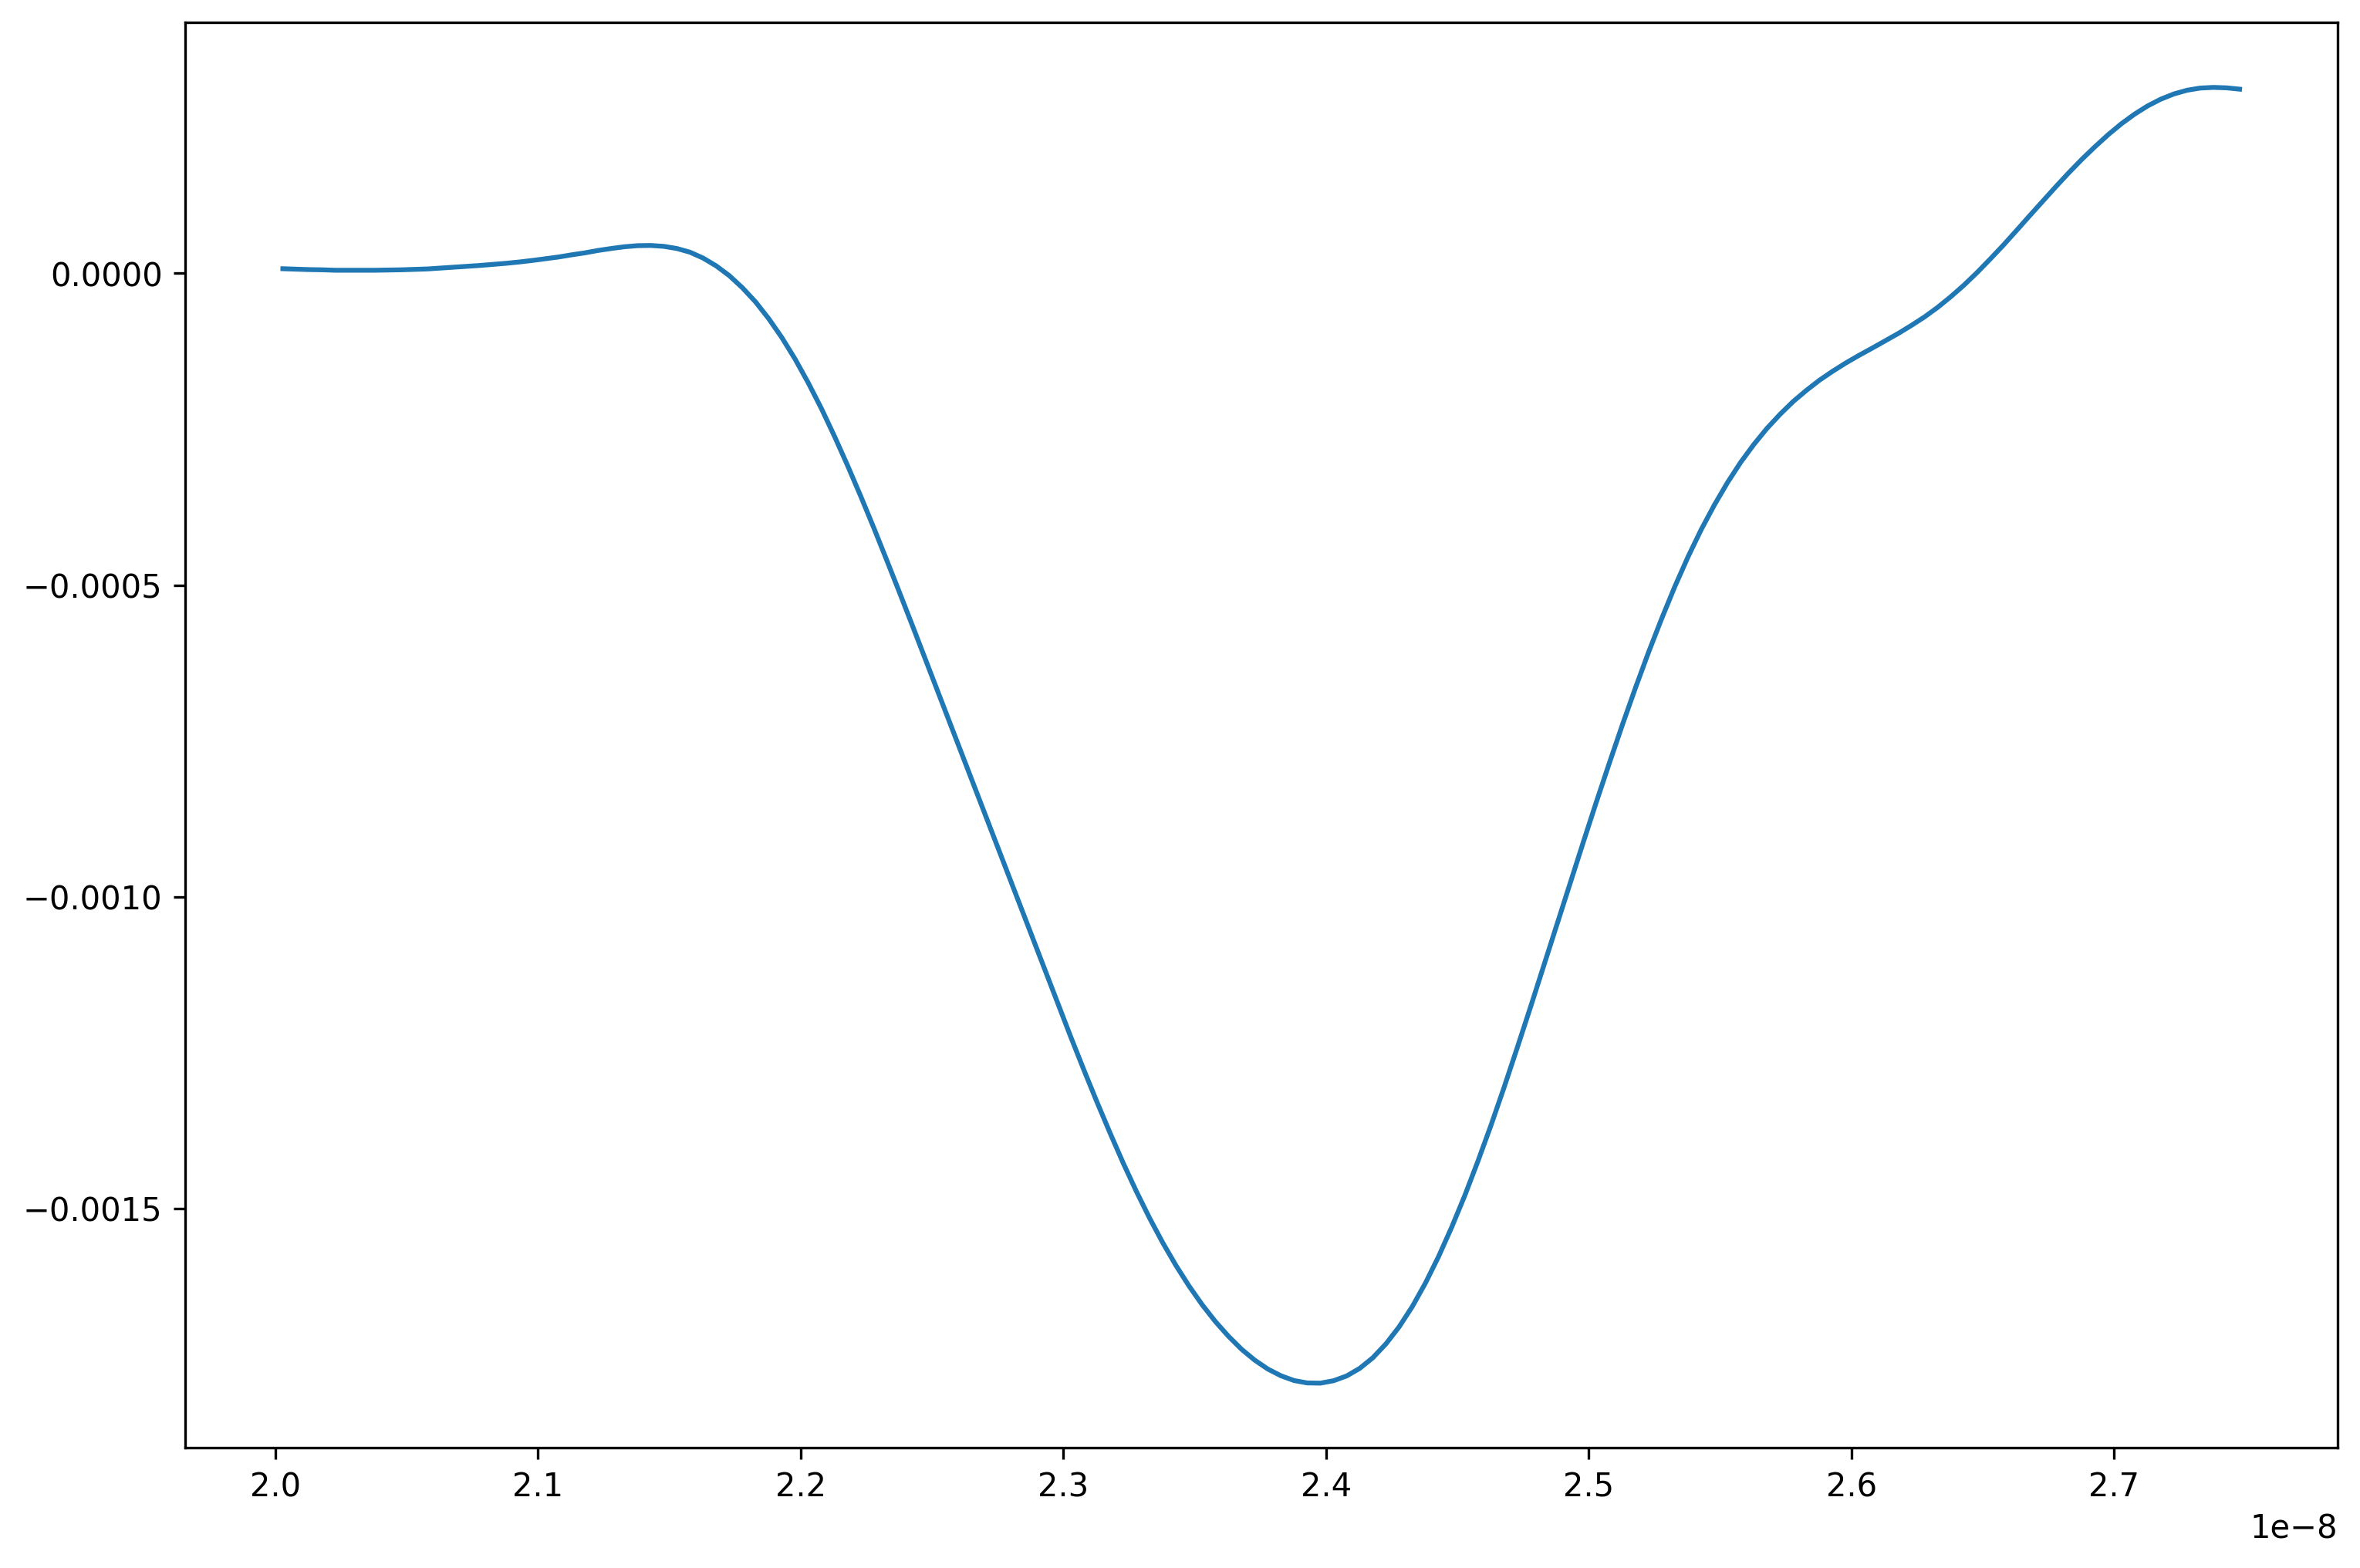

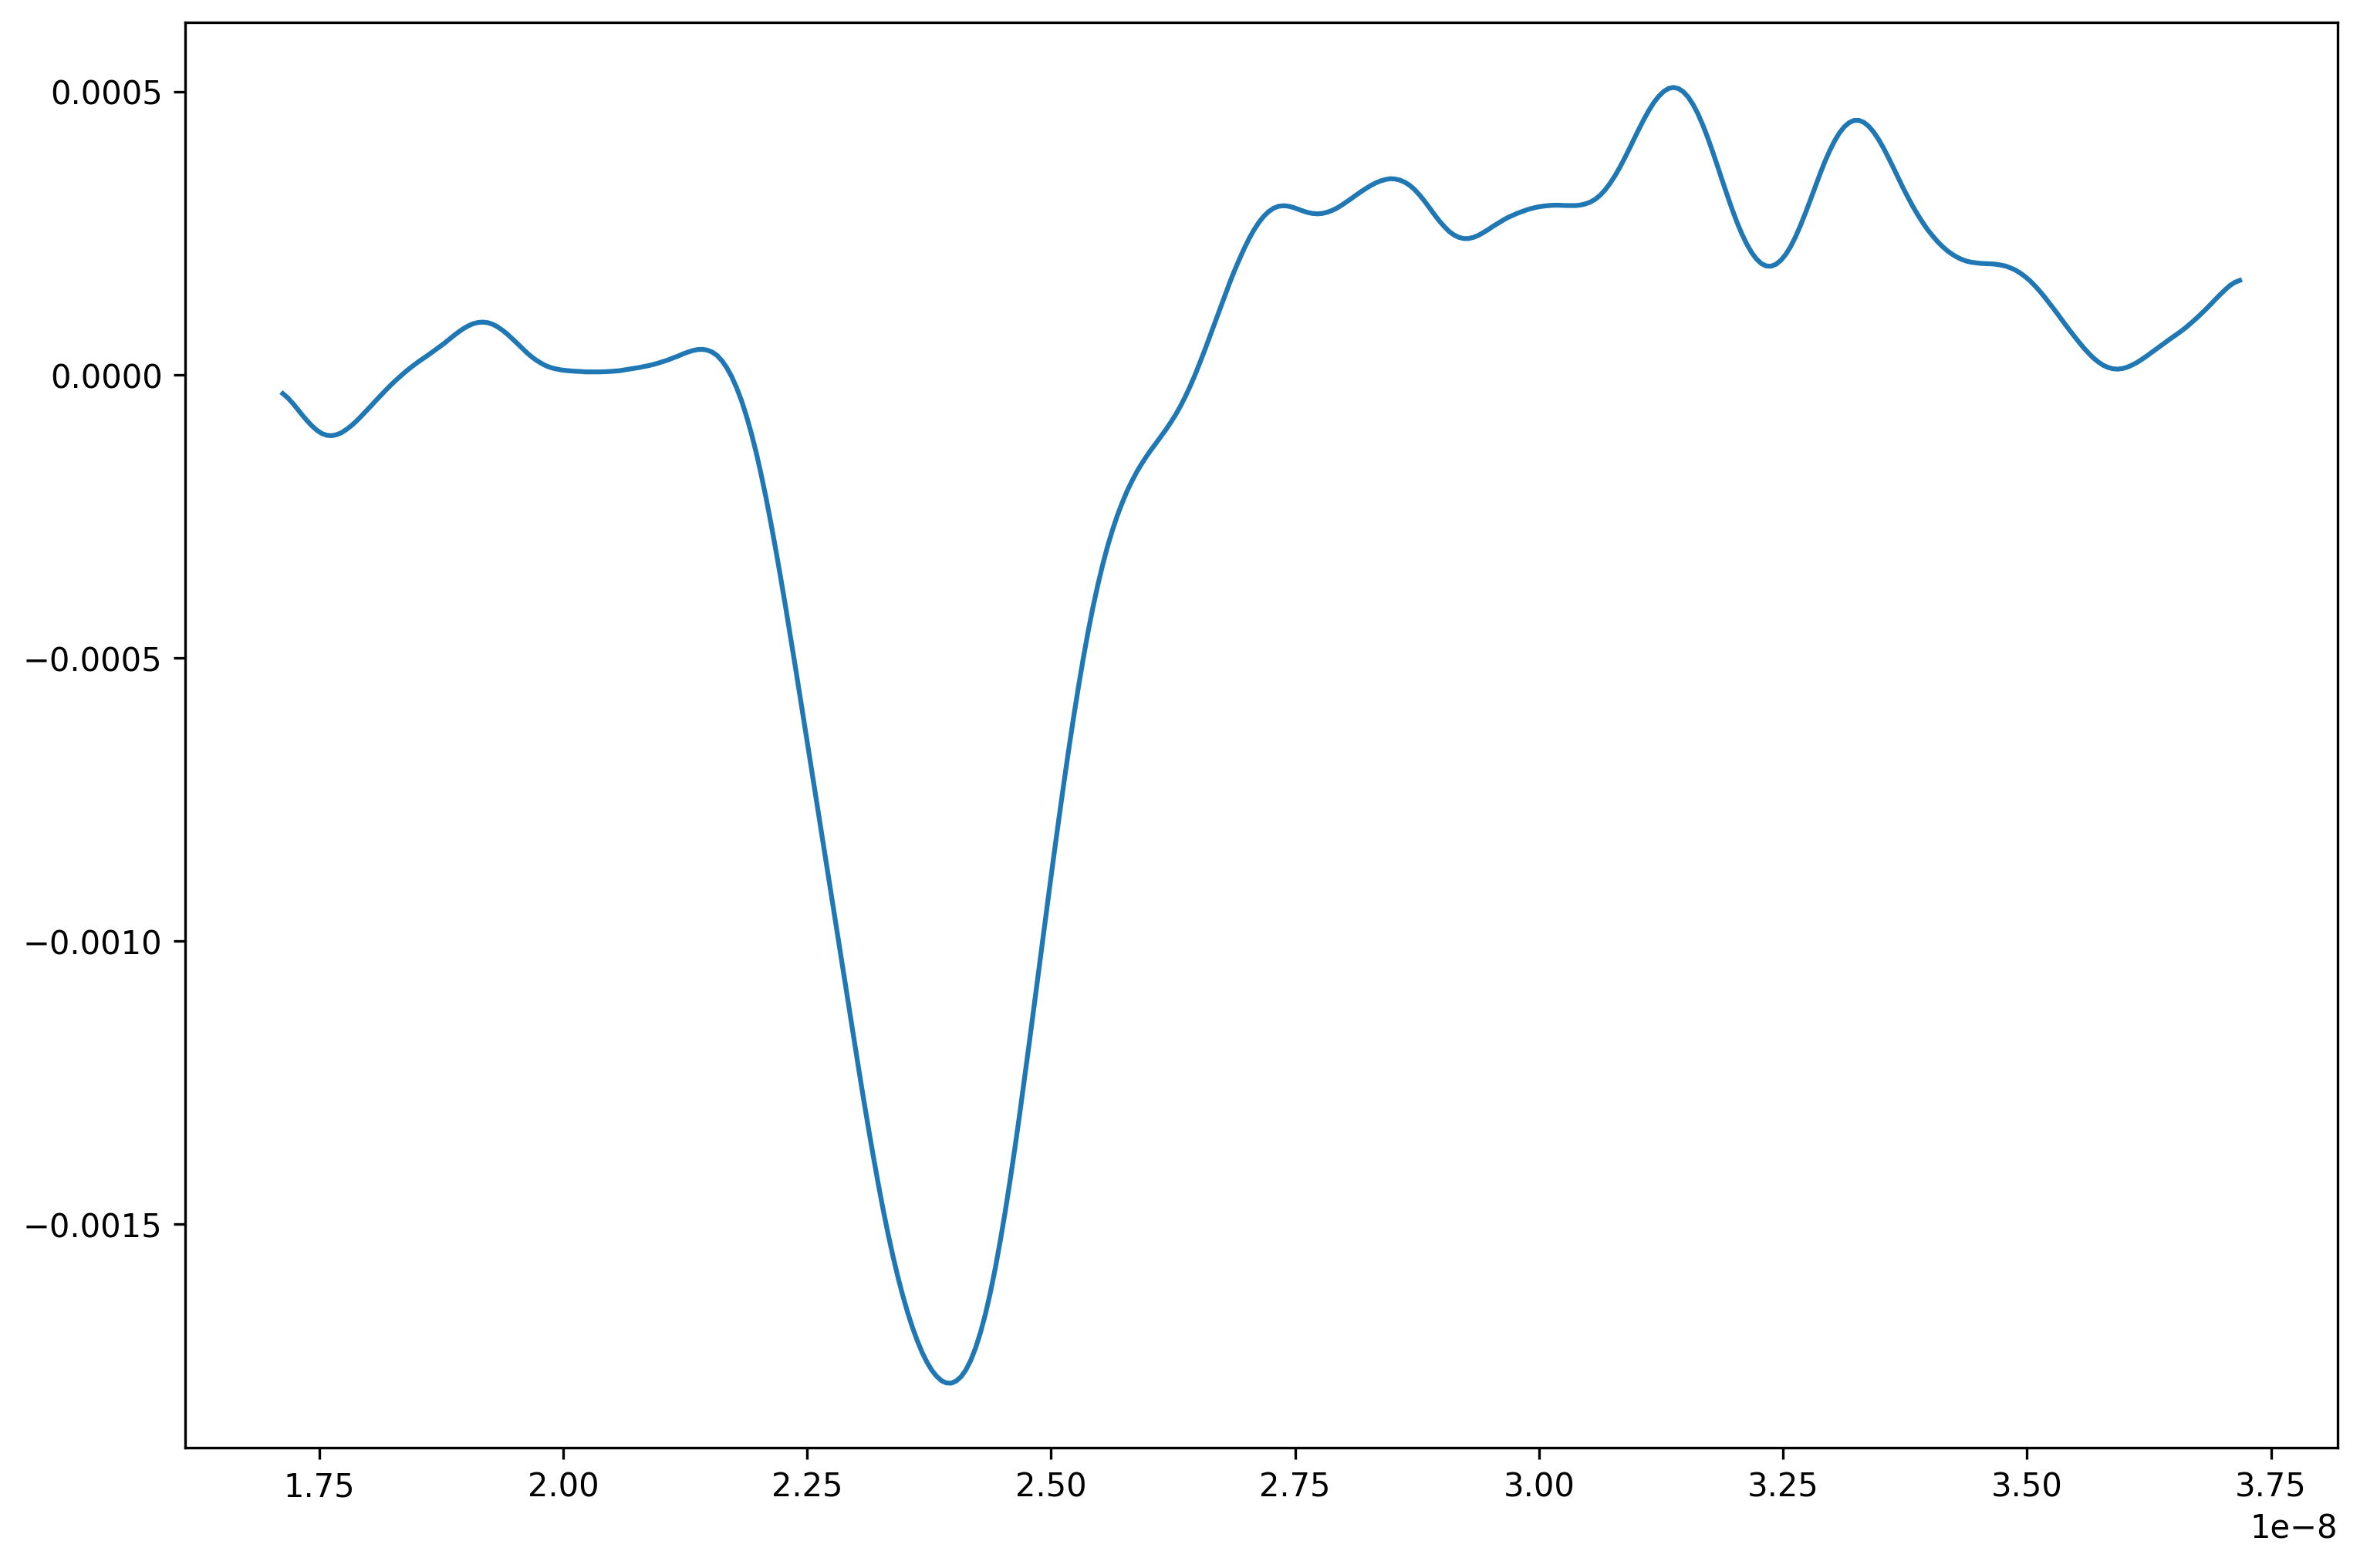

(-3.92520907473656e-12, -484593.7129304395)

In [8]:
print(len(PMT3_10k_1200))
getArea(PMT1_10k_1200[5000],2e-8,2.75e-8,p=True)

[[-1.5534319e-04 -1.9963728e-04 -3.5205078e-04 ...  1.3811384e-05
  -5.5594308e-05 -3.5274833e-04]
 [-1.5534319e-04 -1.9963728e-04 -3.5205078e-04 ...  1.3811384e-05
  -5.5594308e-05 -3.5274833e-04]]
mean = -0.0003558941553583298 stdev = 0.0004555023583560525


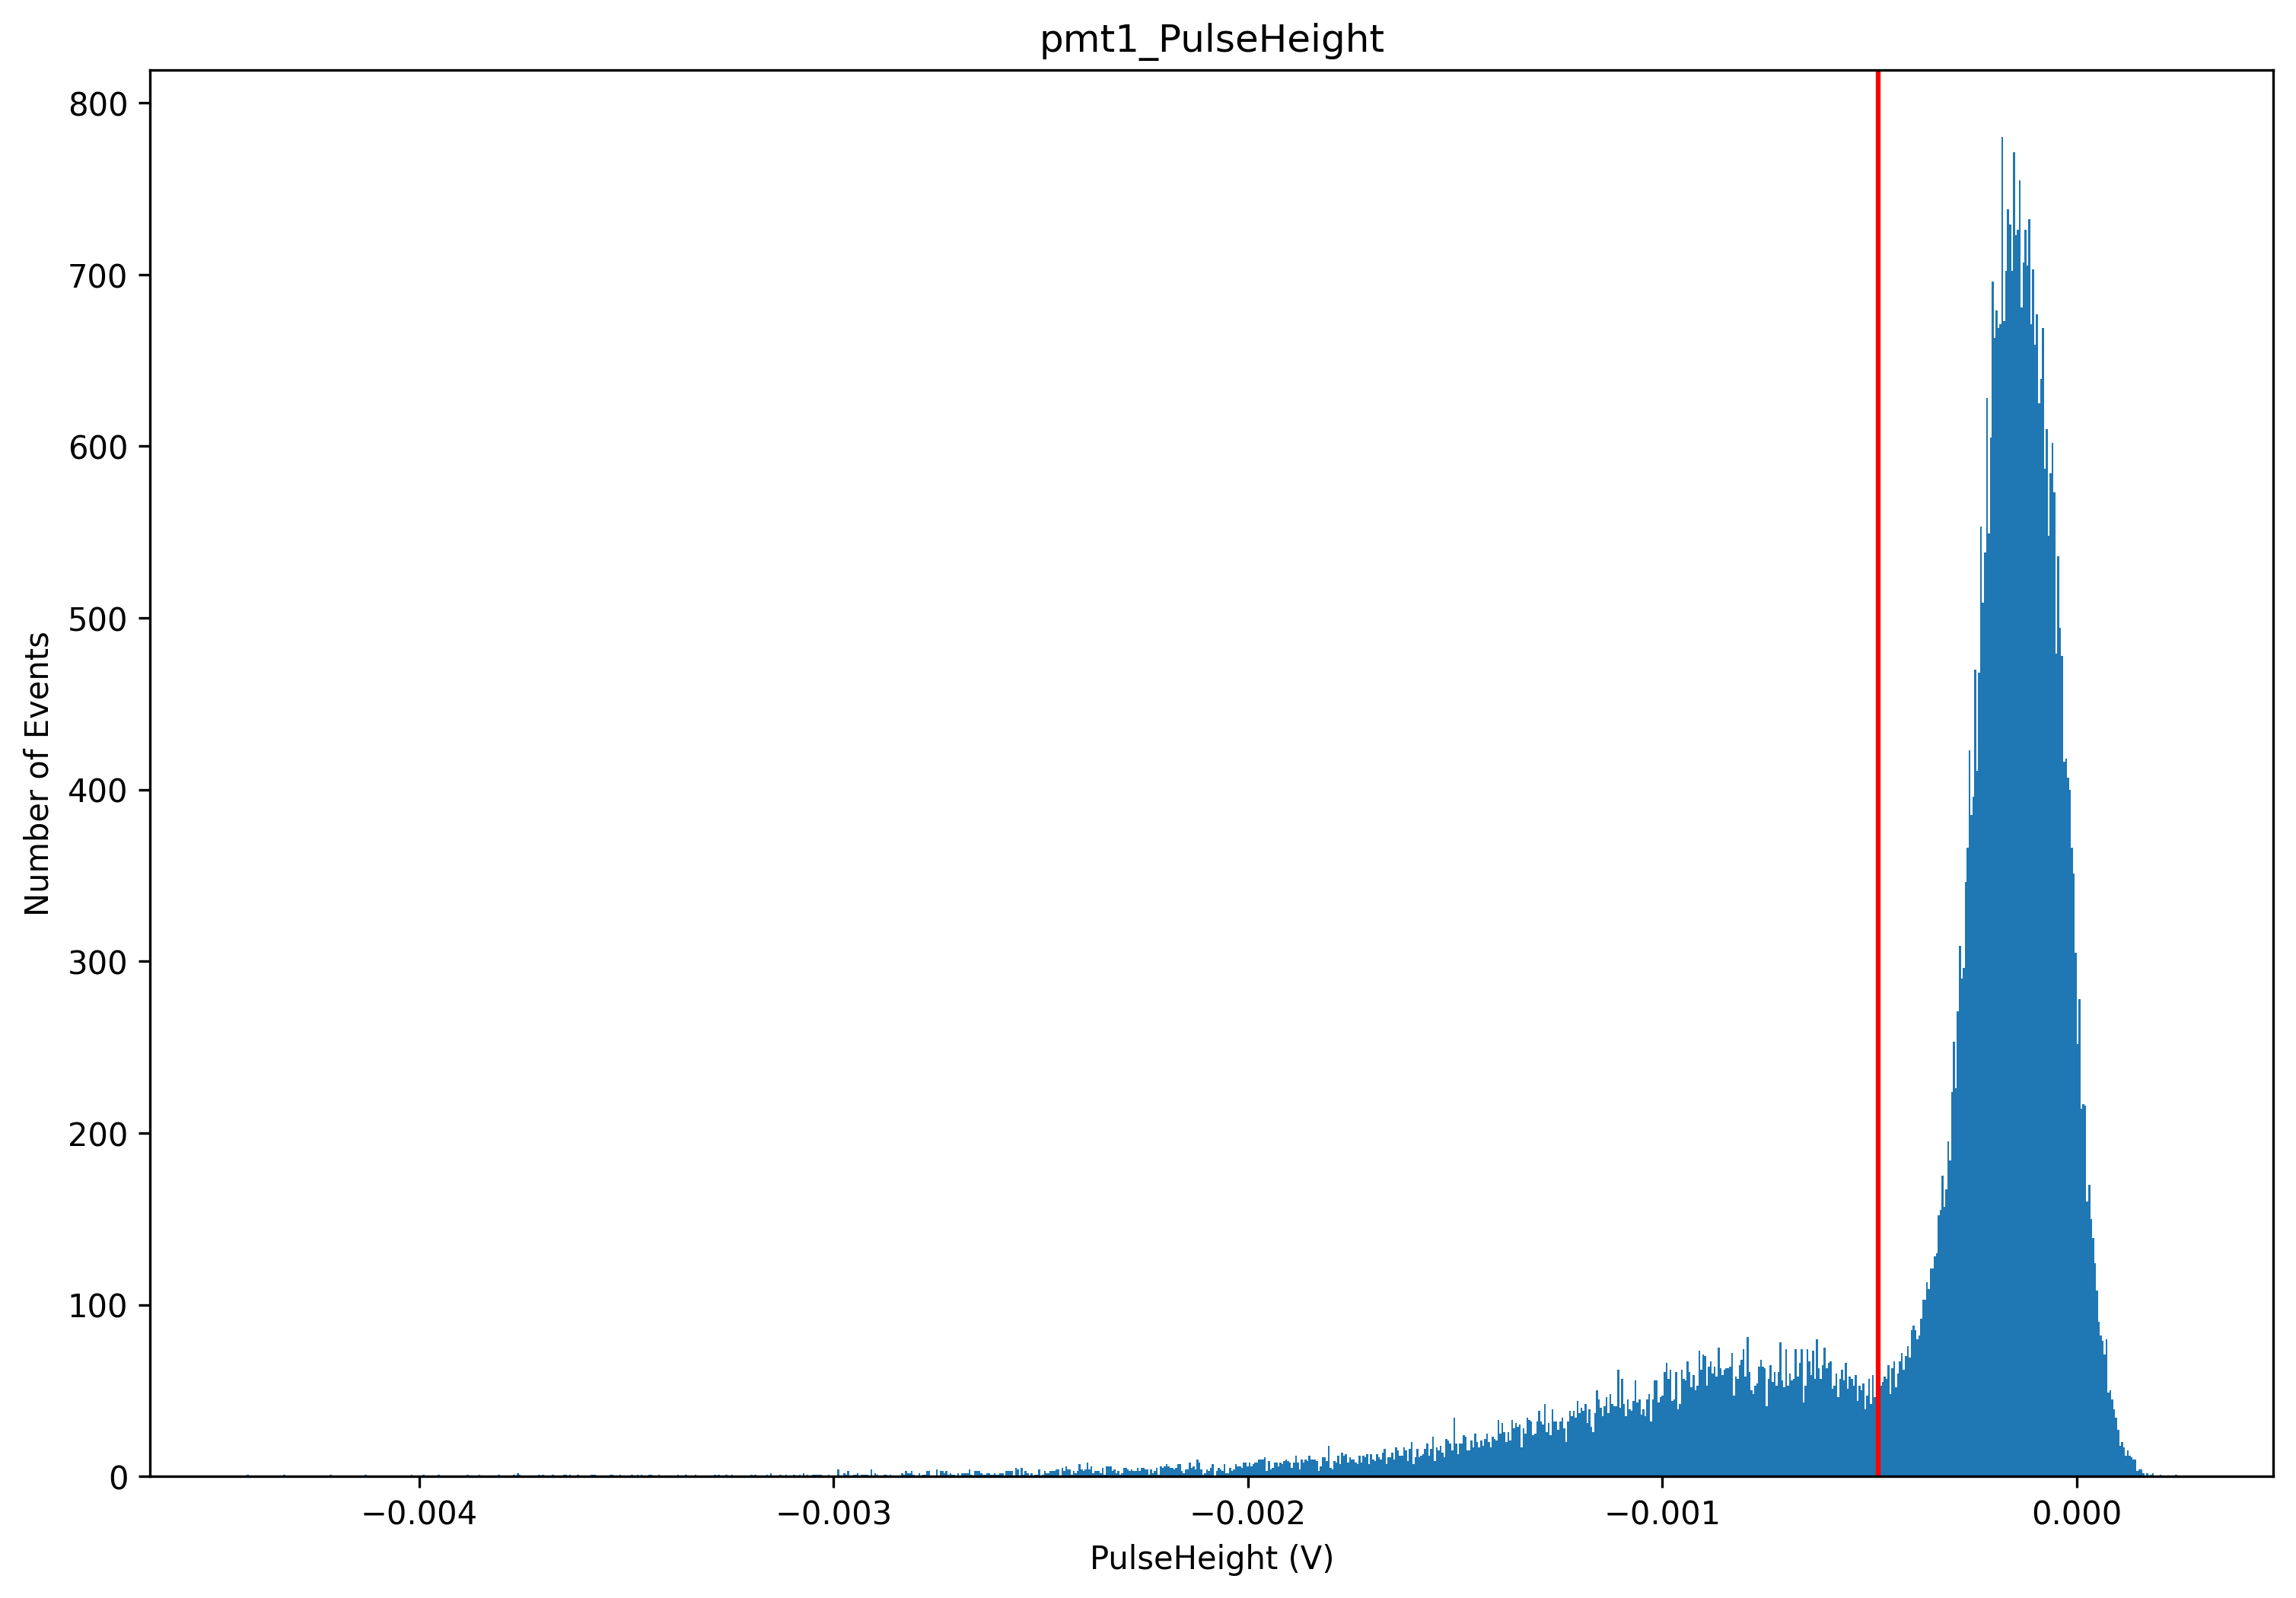

In [9]:
Pmt1PulseHeight=ActualMultiPulseHeightDist(PMT1_10k_1200,9999)

print(Pmt1PulseHeight)
HistIT(Pmt1PulseHeight[1],"pmt1_PulseHeight",1000,"PulseHeight (V)",-4.8e-4)

In [30]:
### Get PMT1
PMT1Gain=MultiAreaGain(PMT1_10k_1200,2e-8,3e-8,minpulse=-4.8e-4,p=False)

mean = 243110.38936718262 stdev = 169139.42640724717


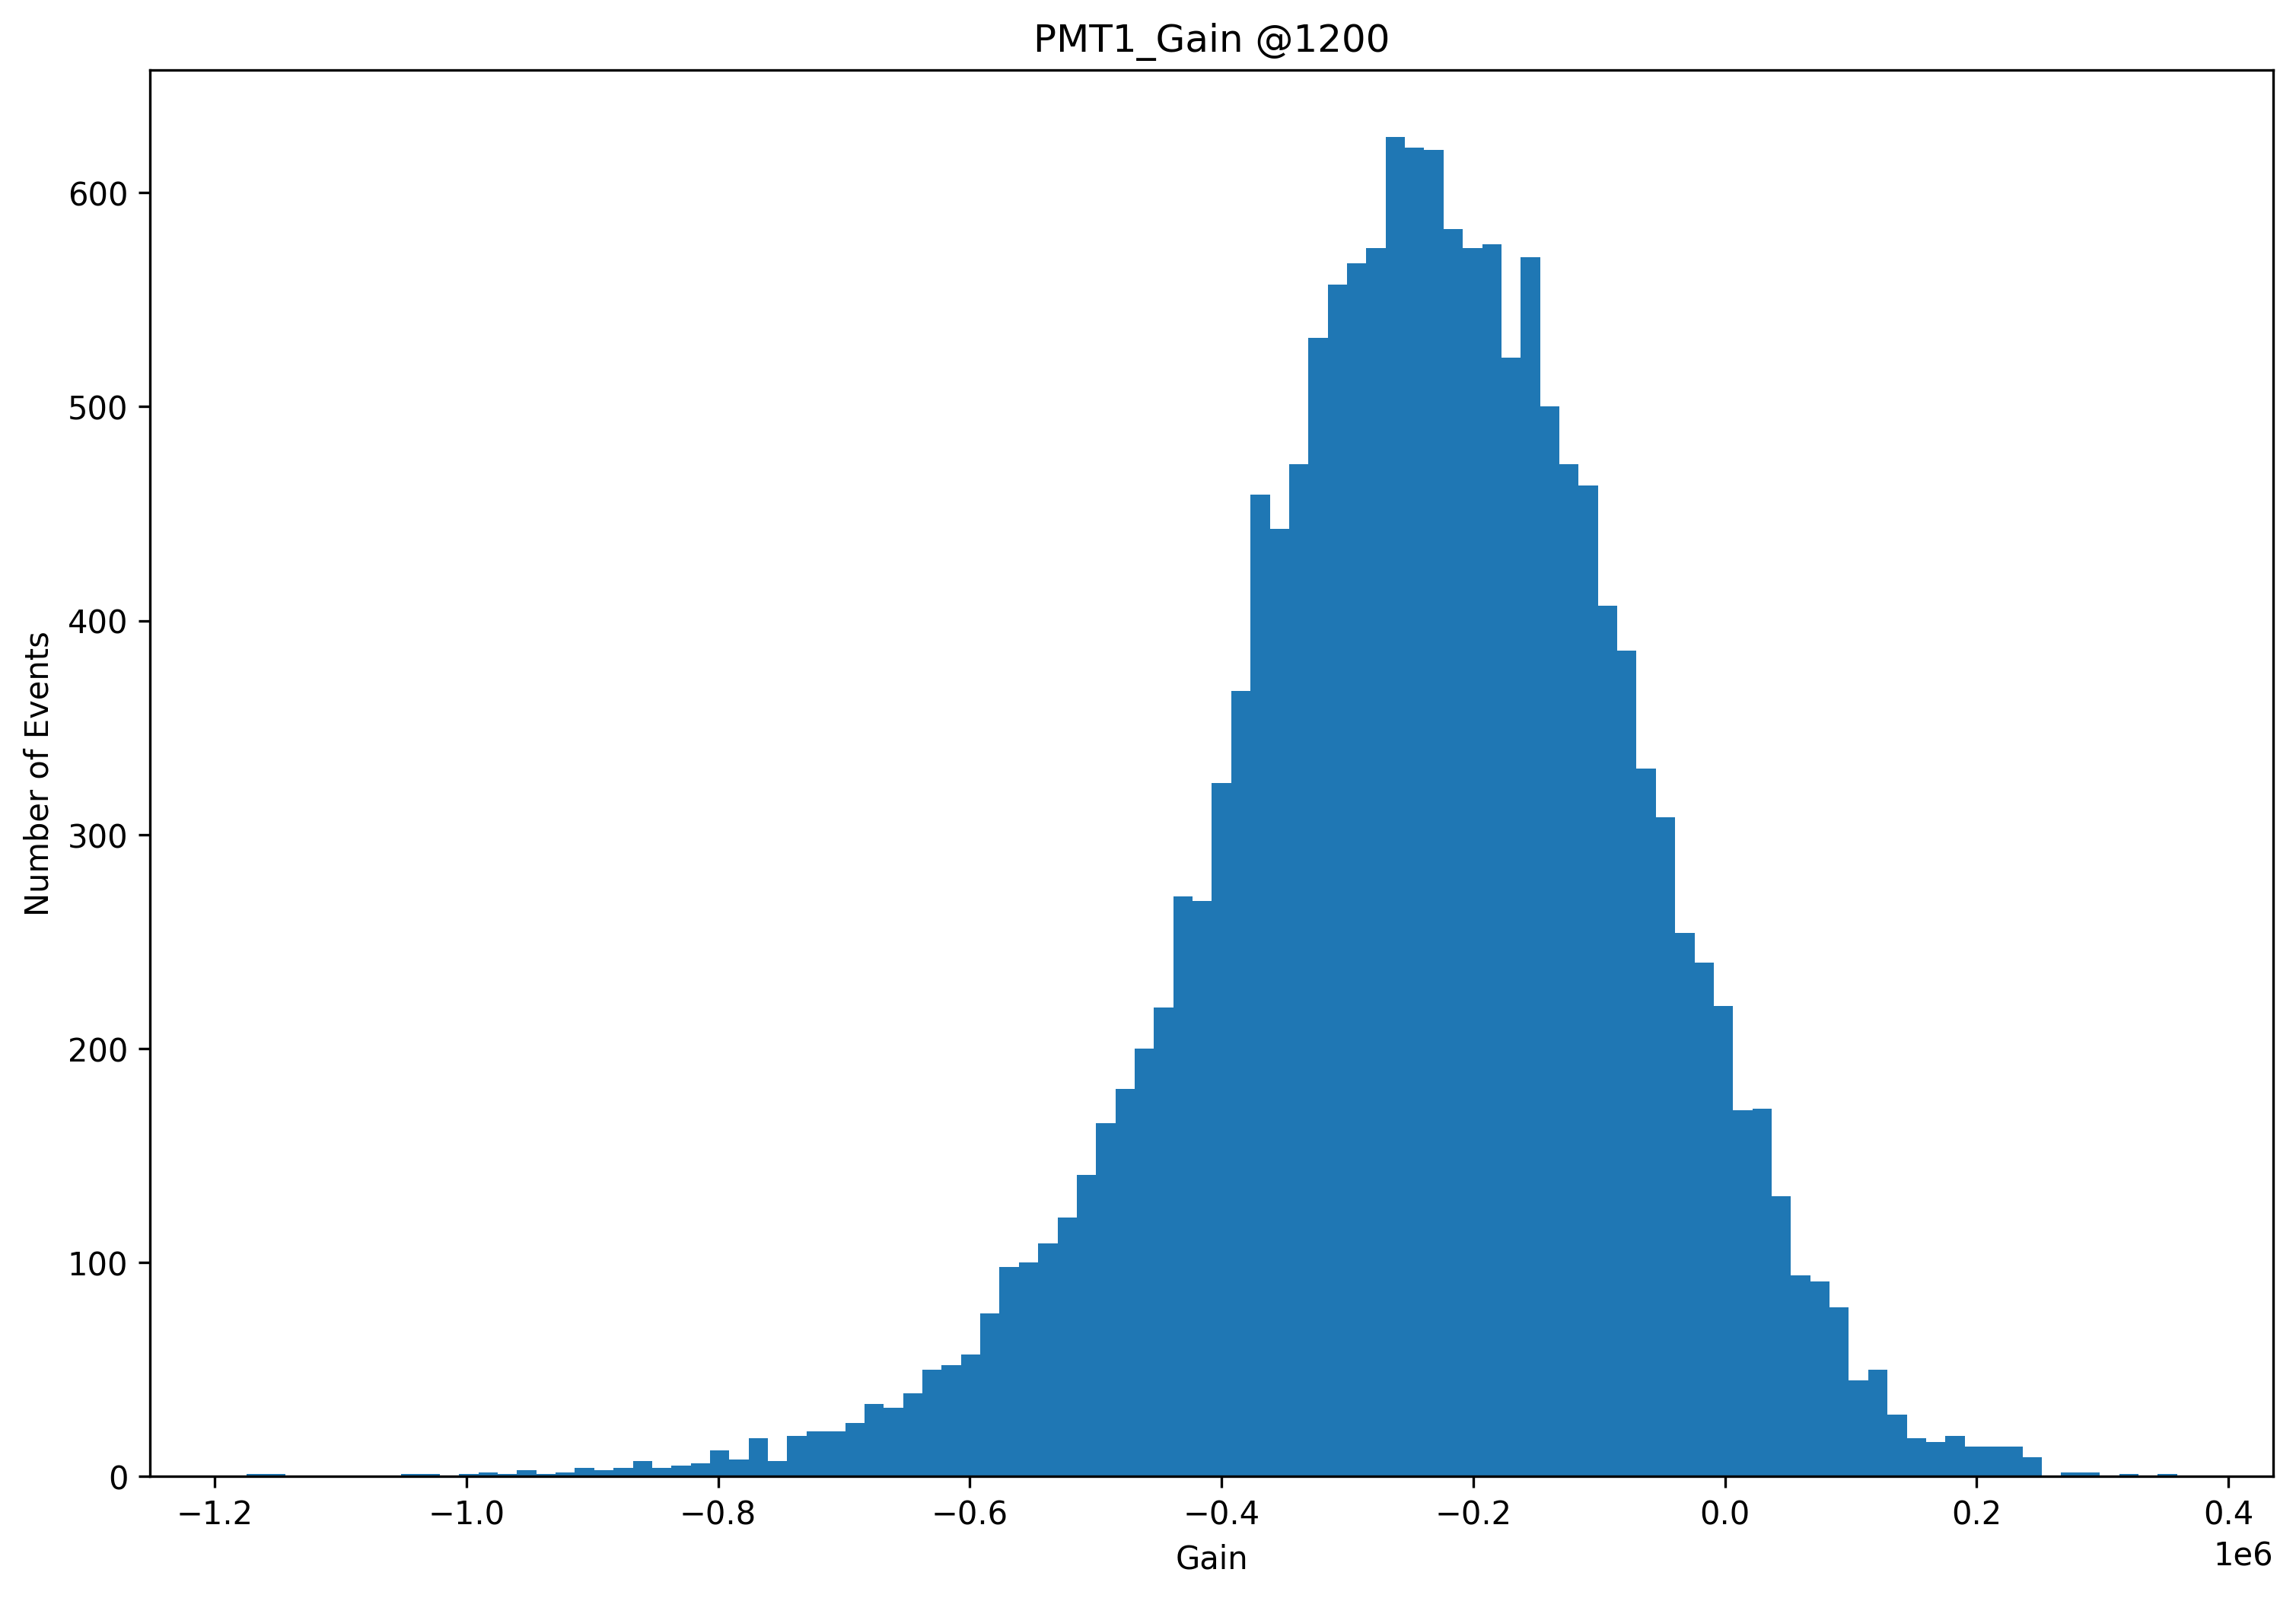

In [32]:
plt.figure(figsize=(12,8),dpi=300)
plt.title("PMT1_Gain @1200")
plt.ylabel("Number of Events")
plt.xlabel("Gain")
#plt.semilogx()
plt.hist(PMT1Gain[1],bins=100)
mean=st.mean(PMT1Gain[1])
stdev=st.stdev(PMT1Gain[1])
print(f"mean = {abs(mean)} stdev = {stdev}")

mean = -0.0011995288366954 stdev = 0.001628059435917578


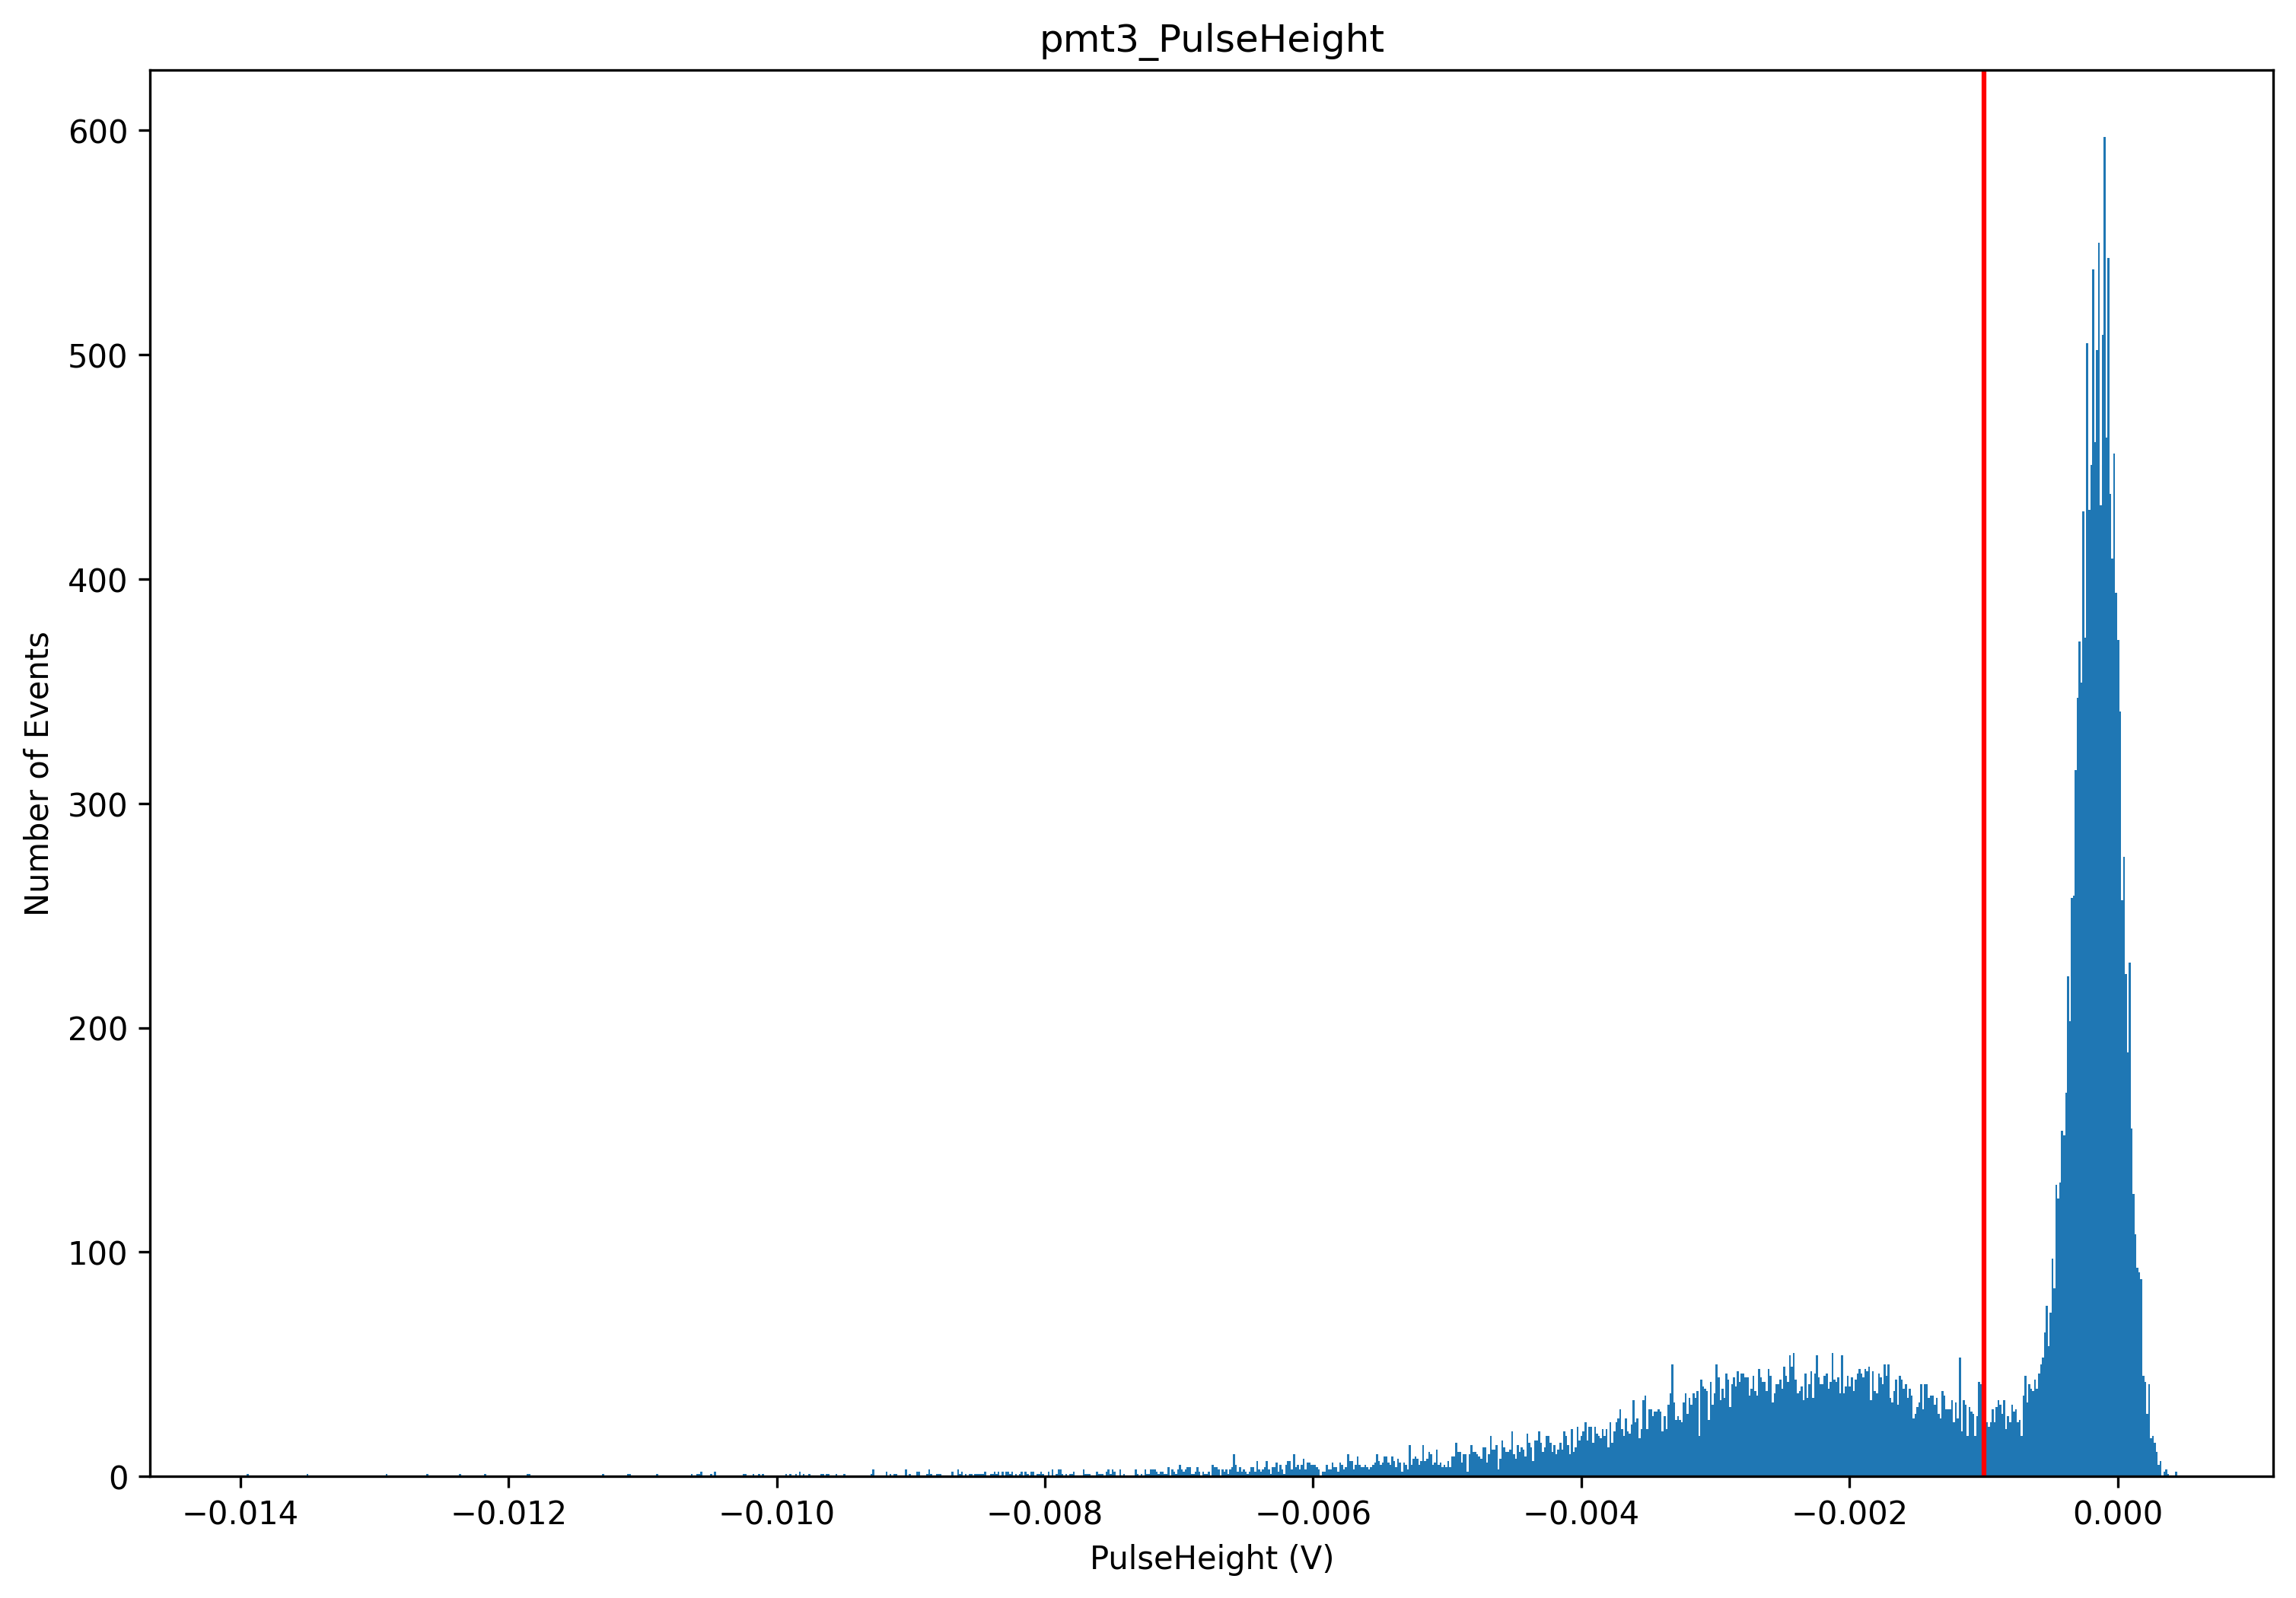

In [12]:
Pmt3PulseHeight=ActualMultiPulseHeightDist(PMT3_10k_1200,9999)

HistIT(Pmt3PulseHeight[1],"pmt3_PulseHeight",1000,"PulseHeight (V)",-1e-3)

In [13]:
Pmt3PulseHeight[1]

array([-0.00183984, -0.00025586, -0.00026758, ..., -0.00207422,
       -0.00033008, -0.00031055])

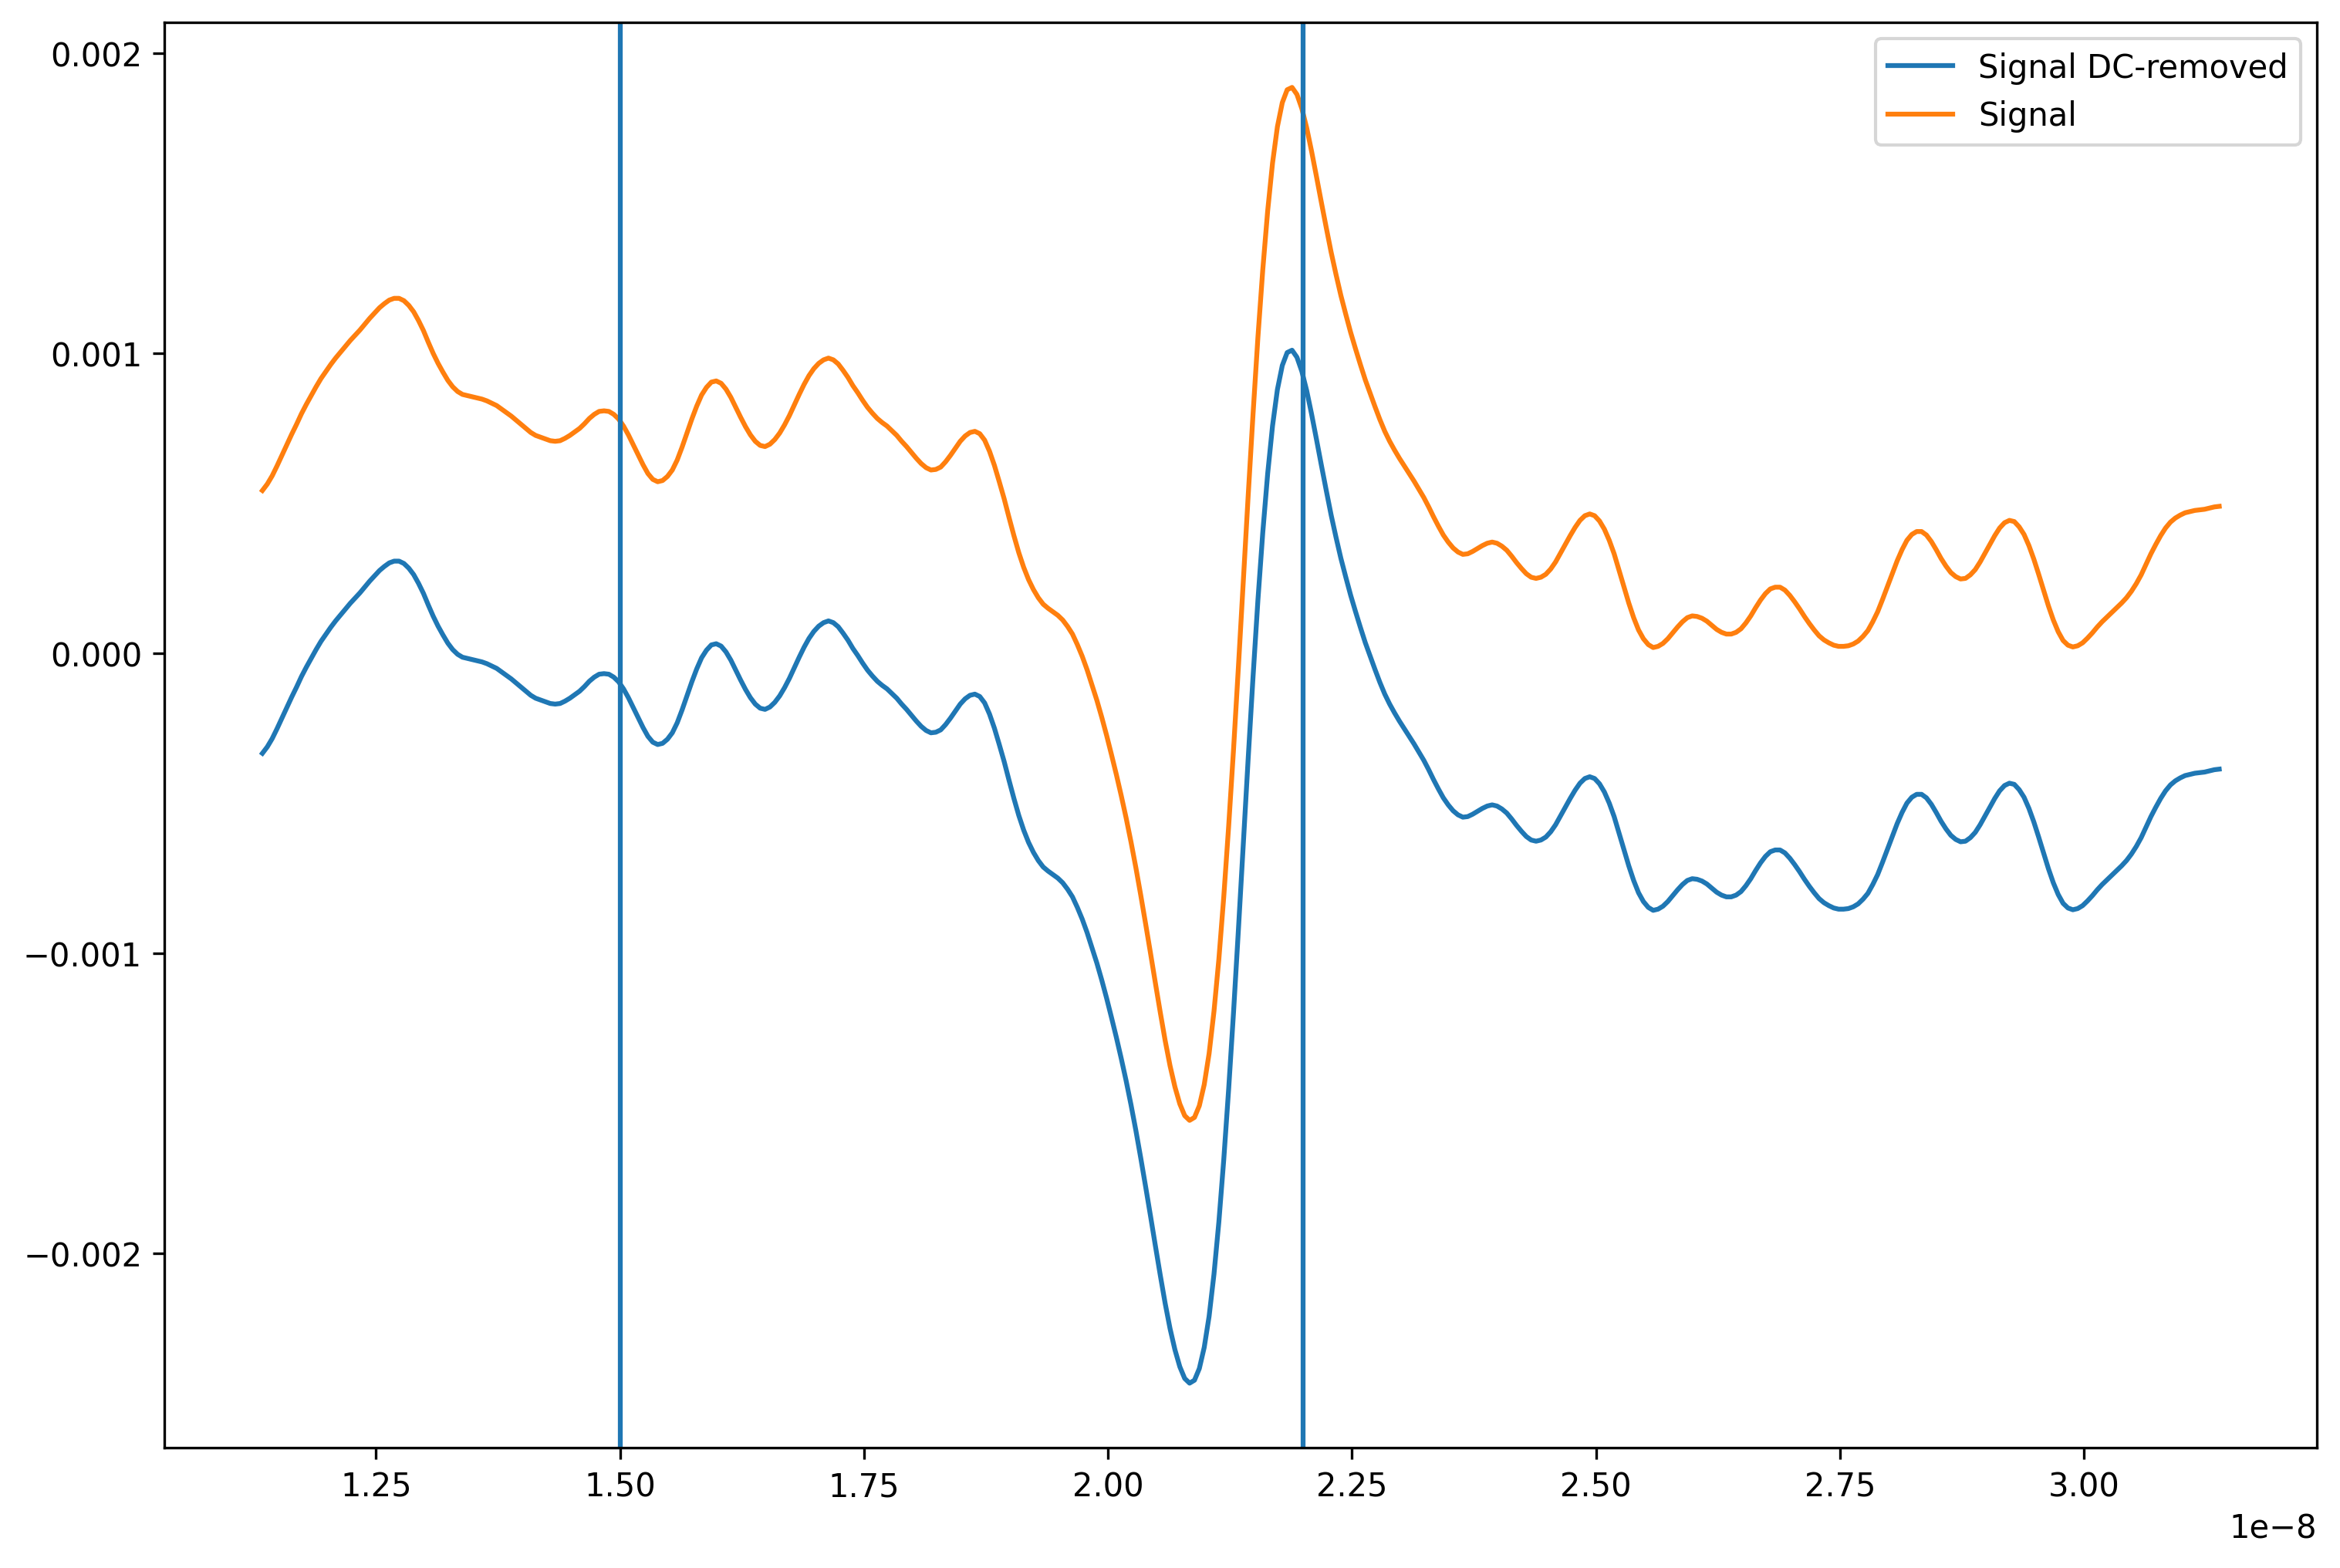

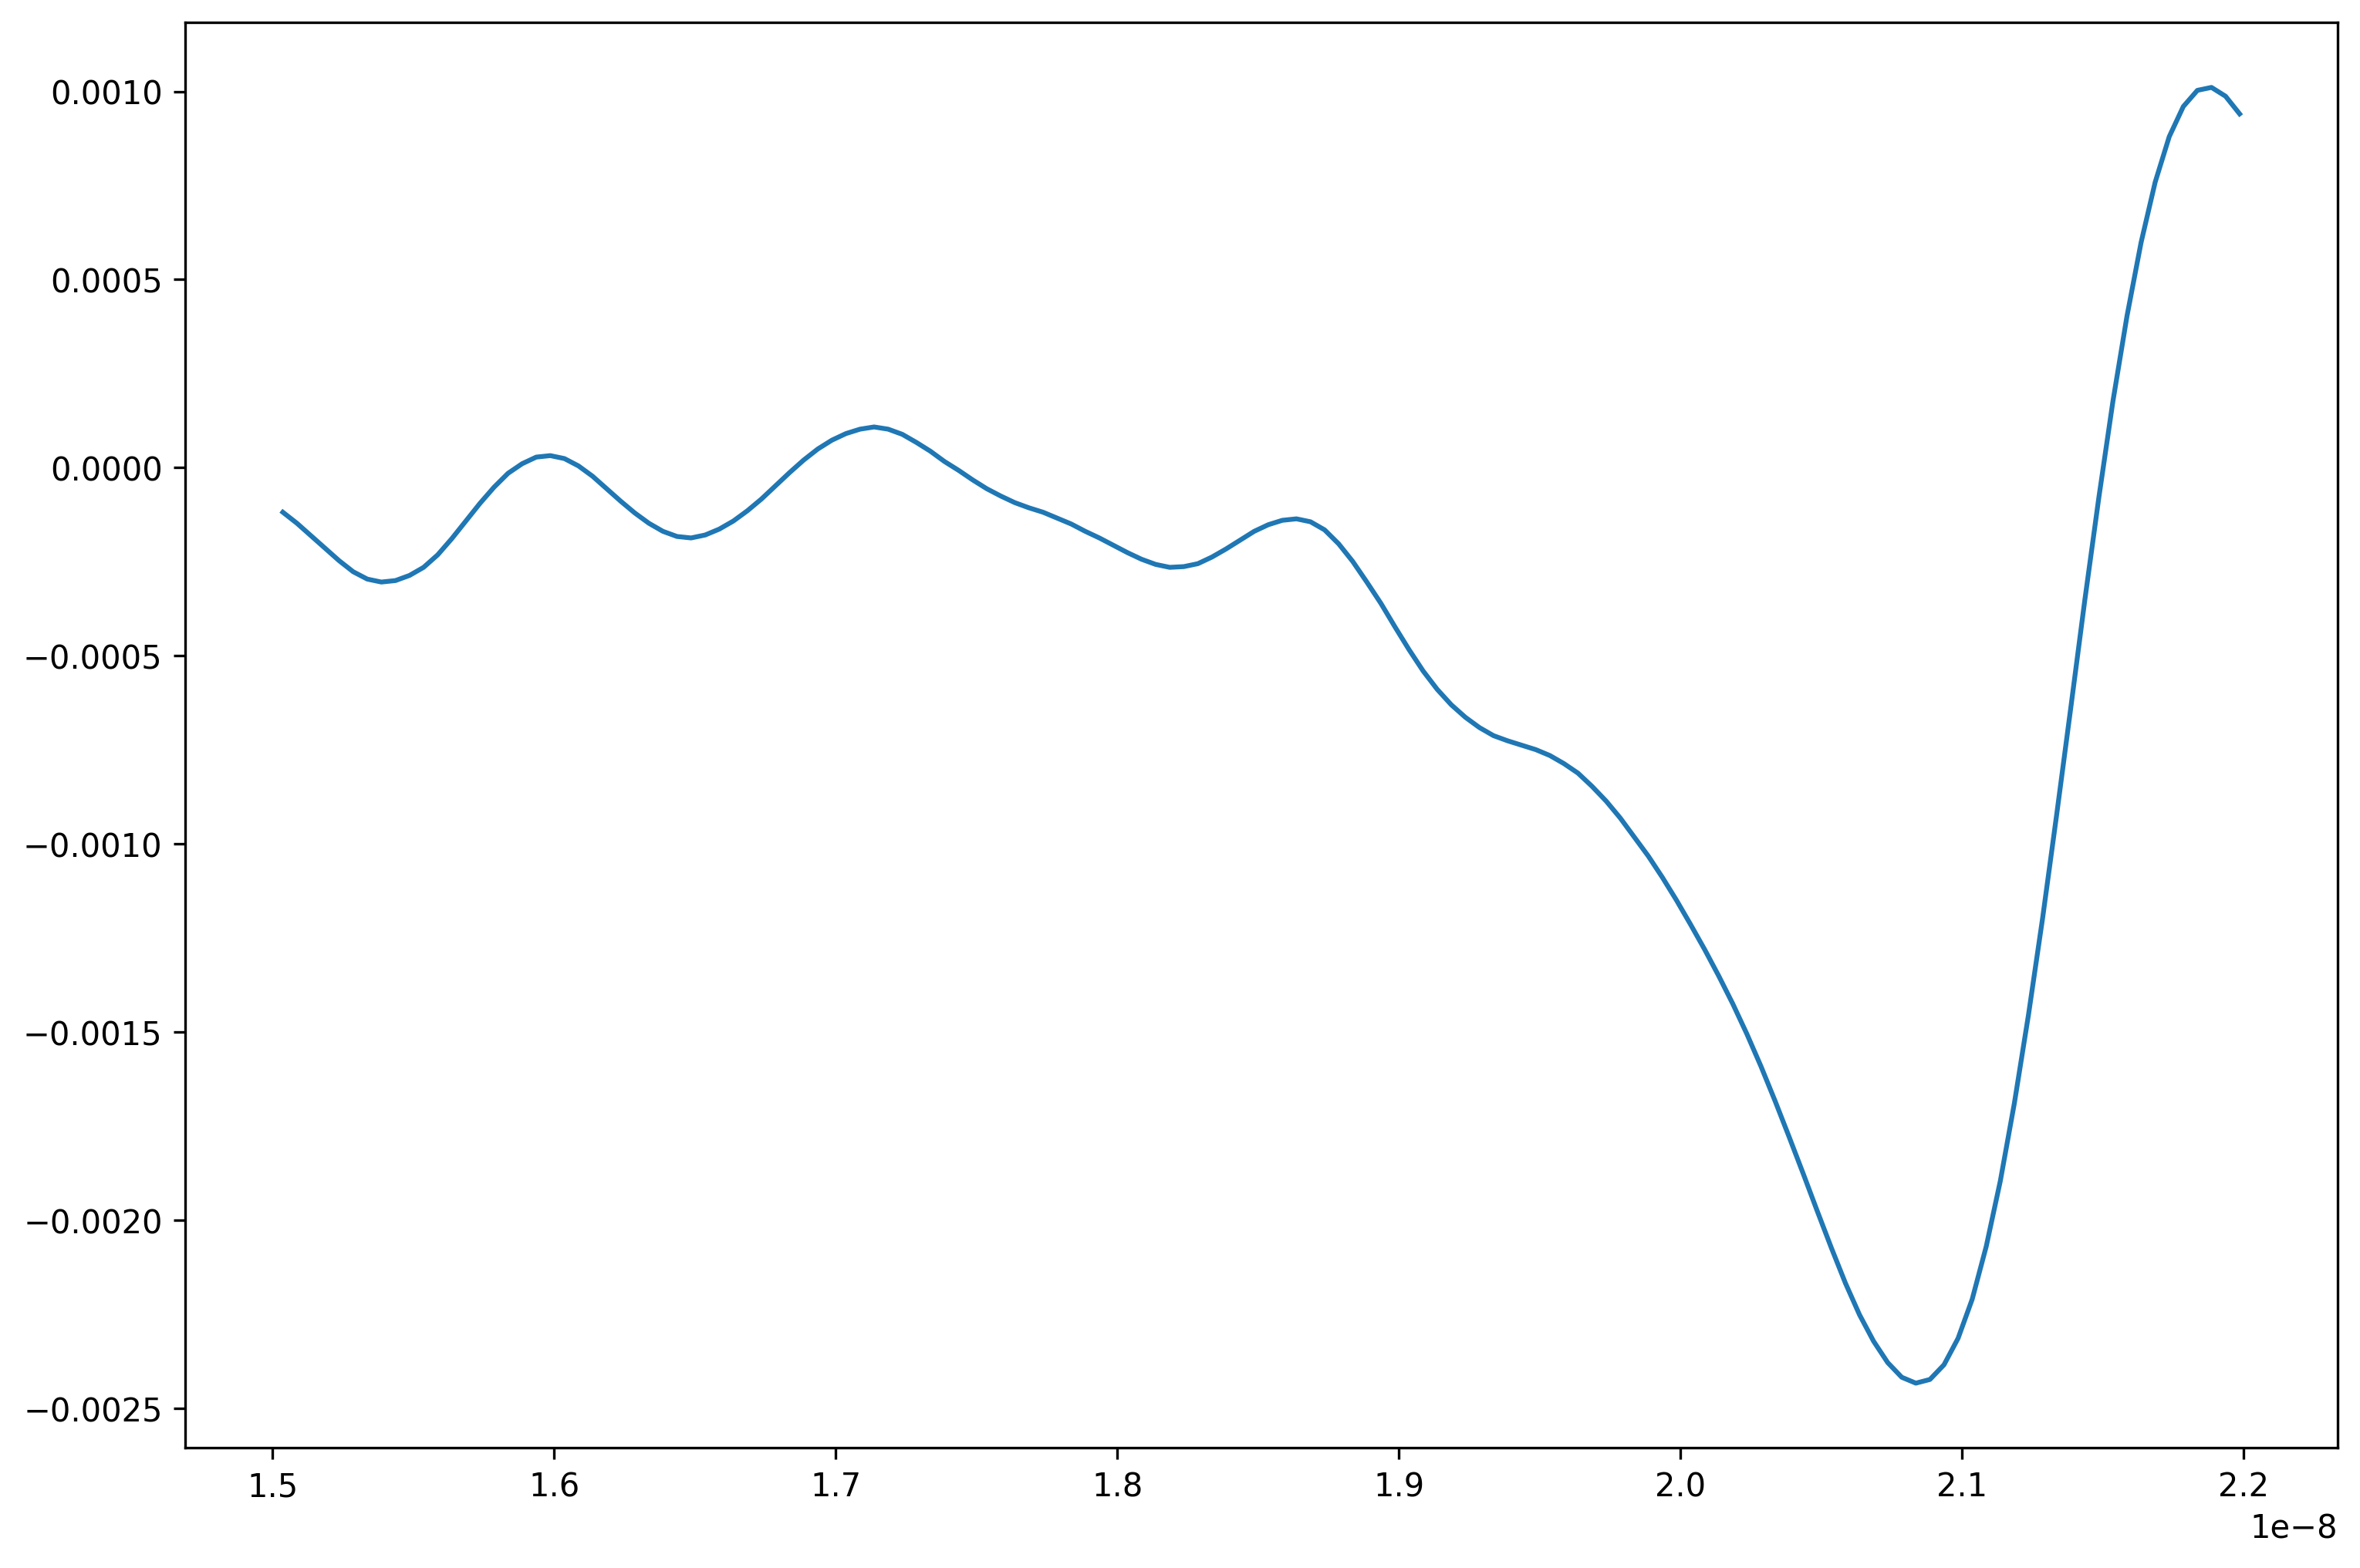

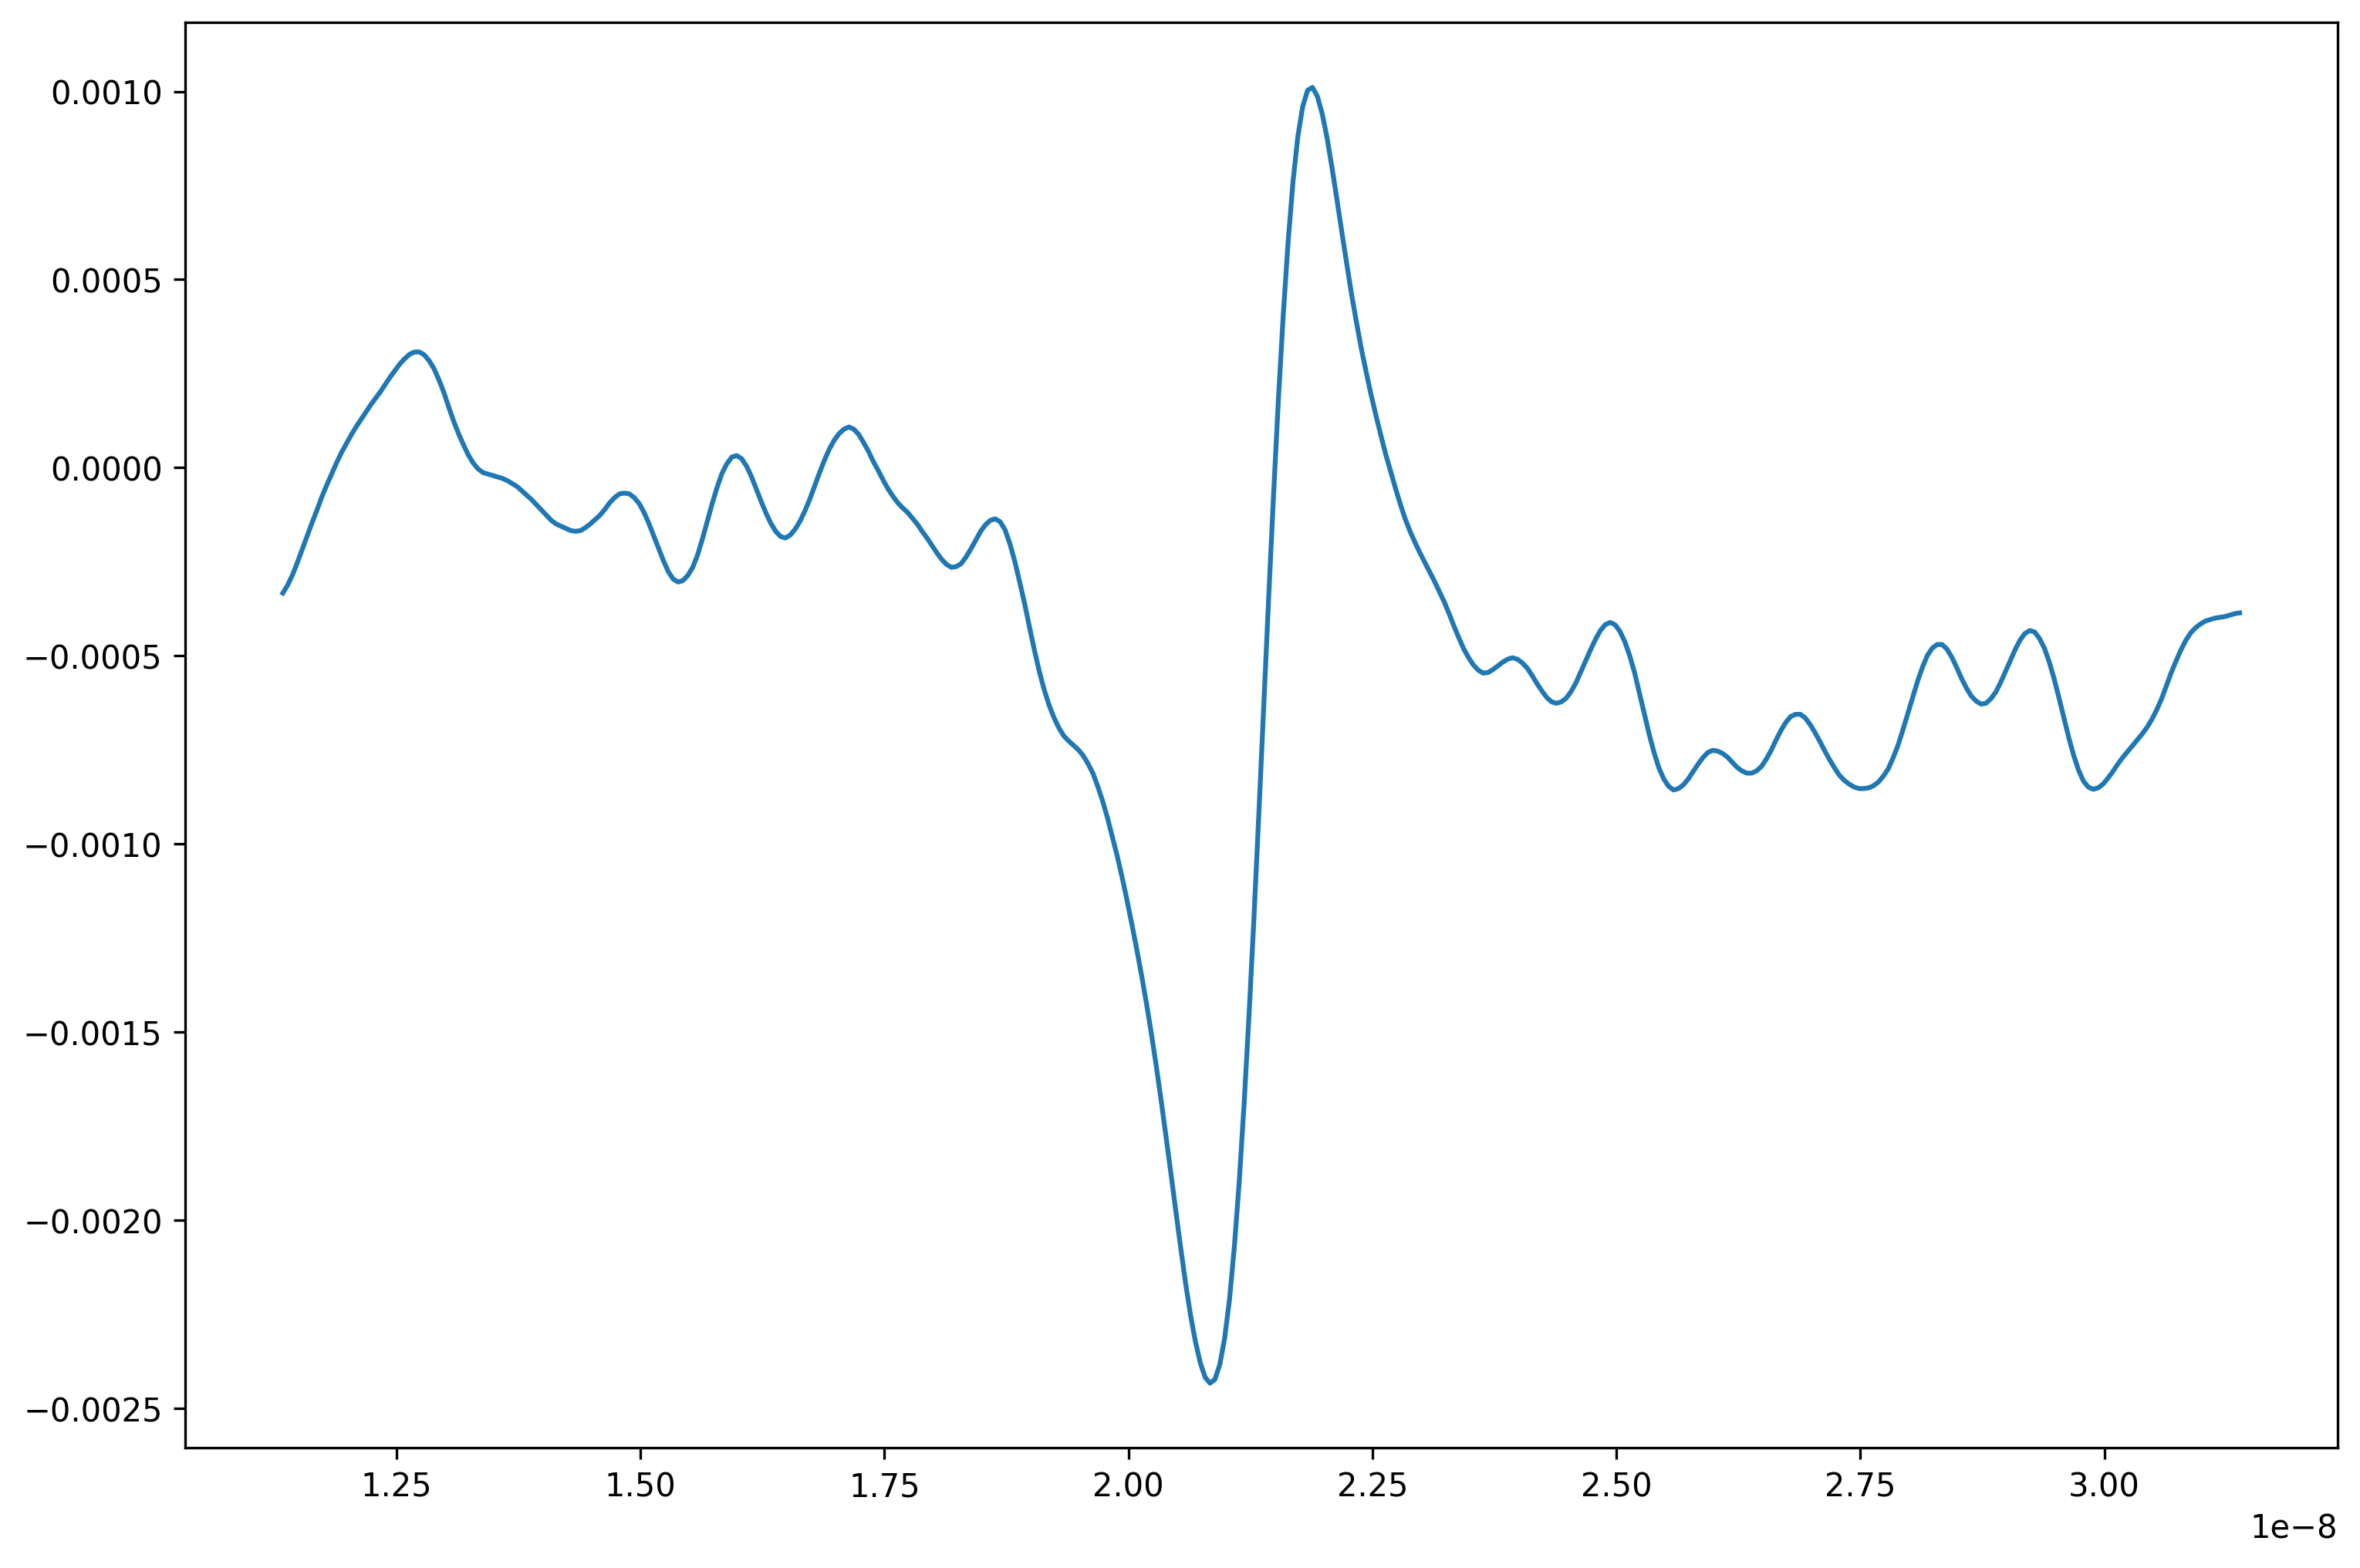

(-3.4990368432770276e-12, -431979.85719469475)

In [29]:
getArea(PMT3_10k_1200[110],1.5e-8,2.2e-8,p=True)

In [27]:
### Get PMT1
PMT3Gain=MultiAreaGain(PMT3_10k_1200,1.5e-8,2.2e-8,minpulse=-1e-3)

mean = 458624.793936129 stdev = 301222.73025880347


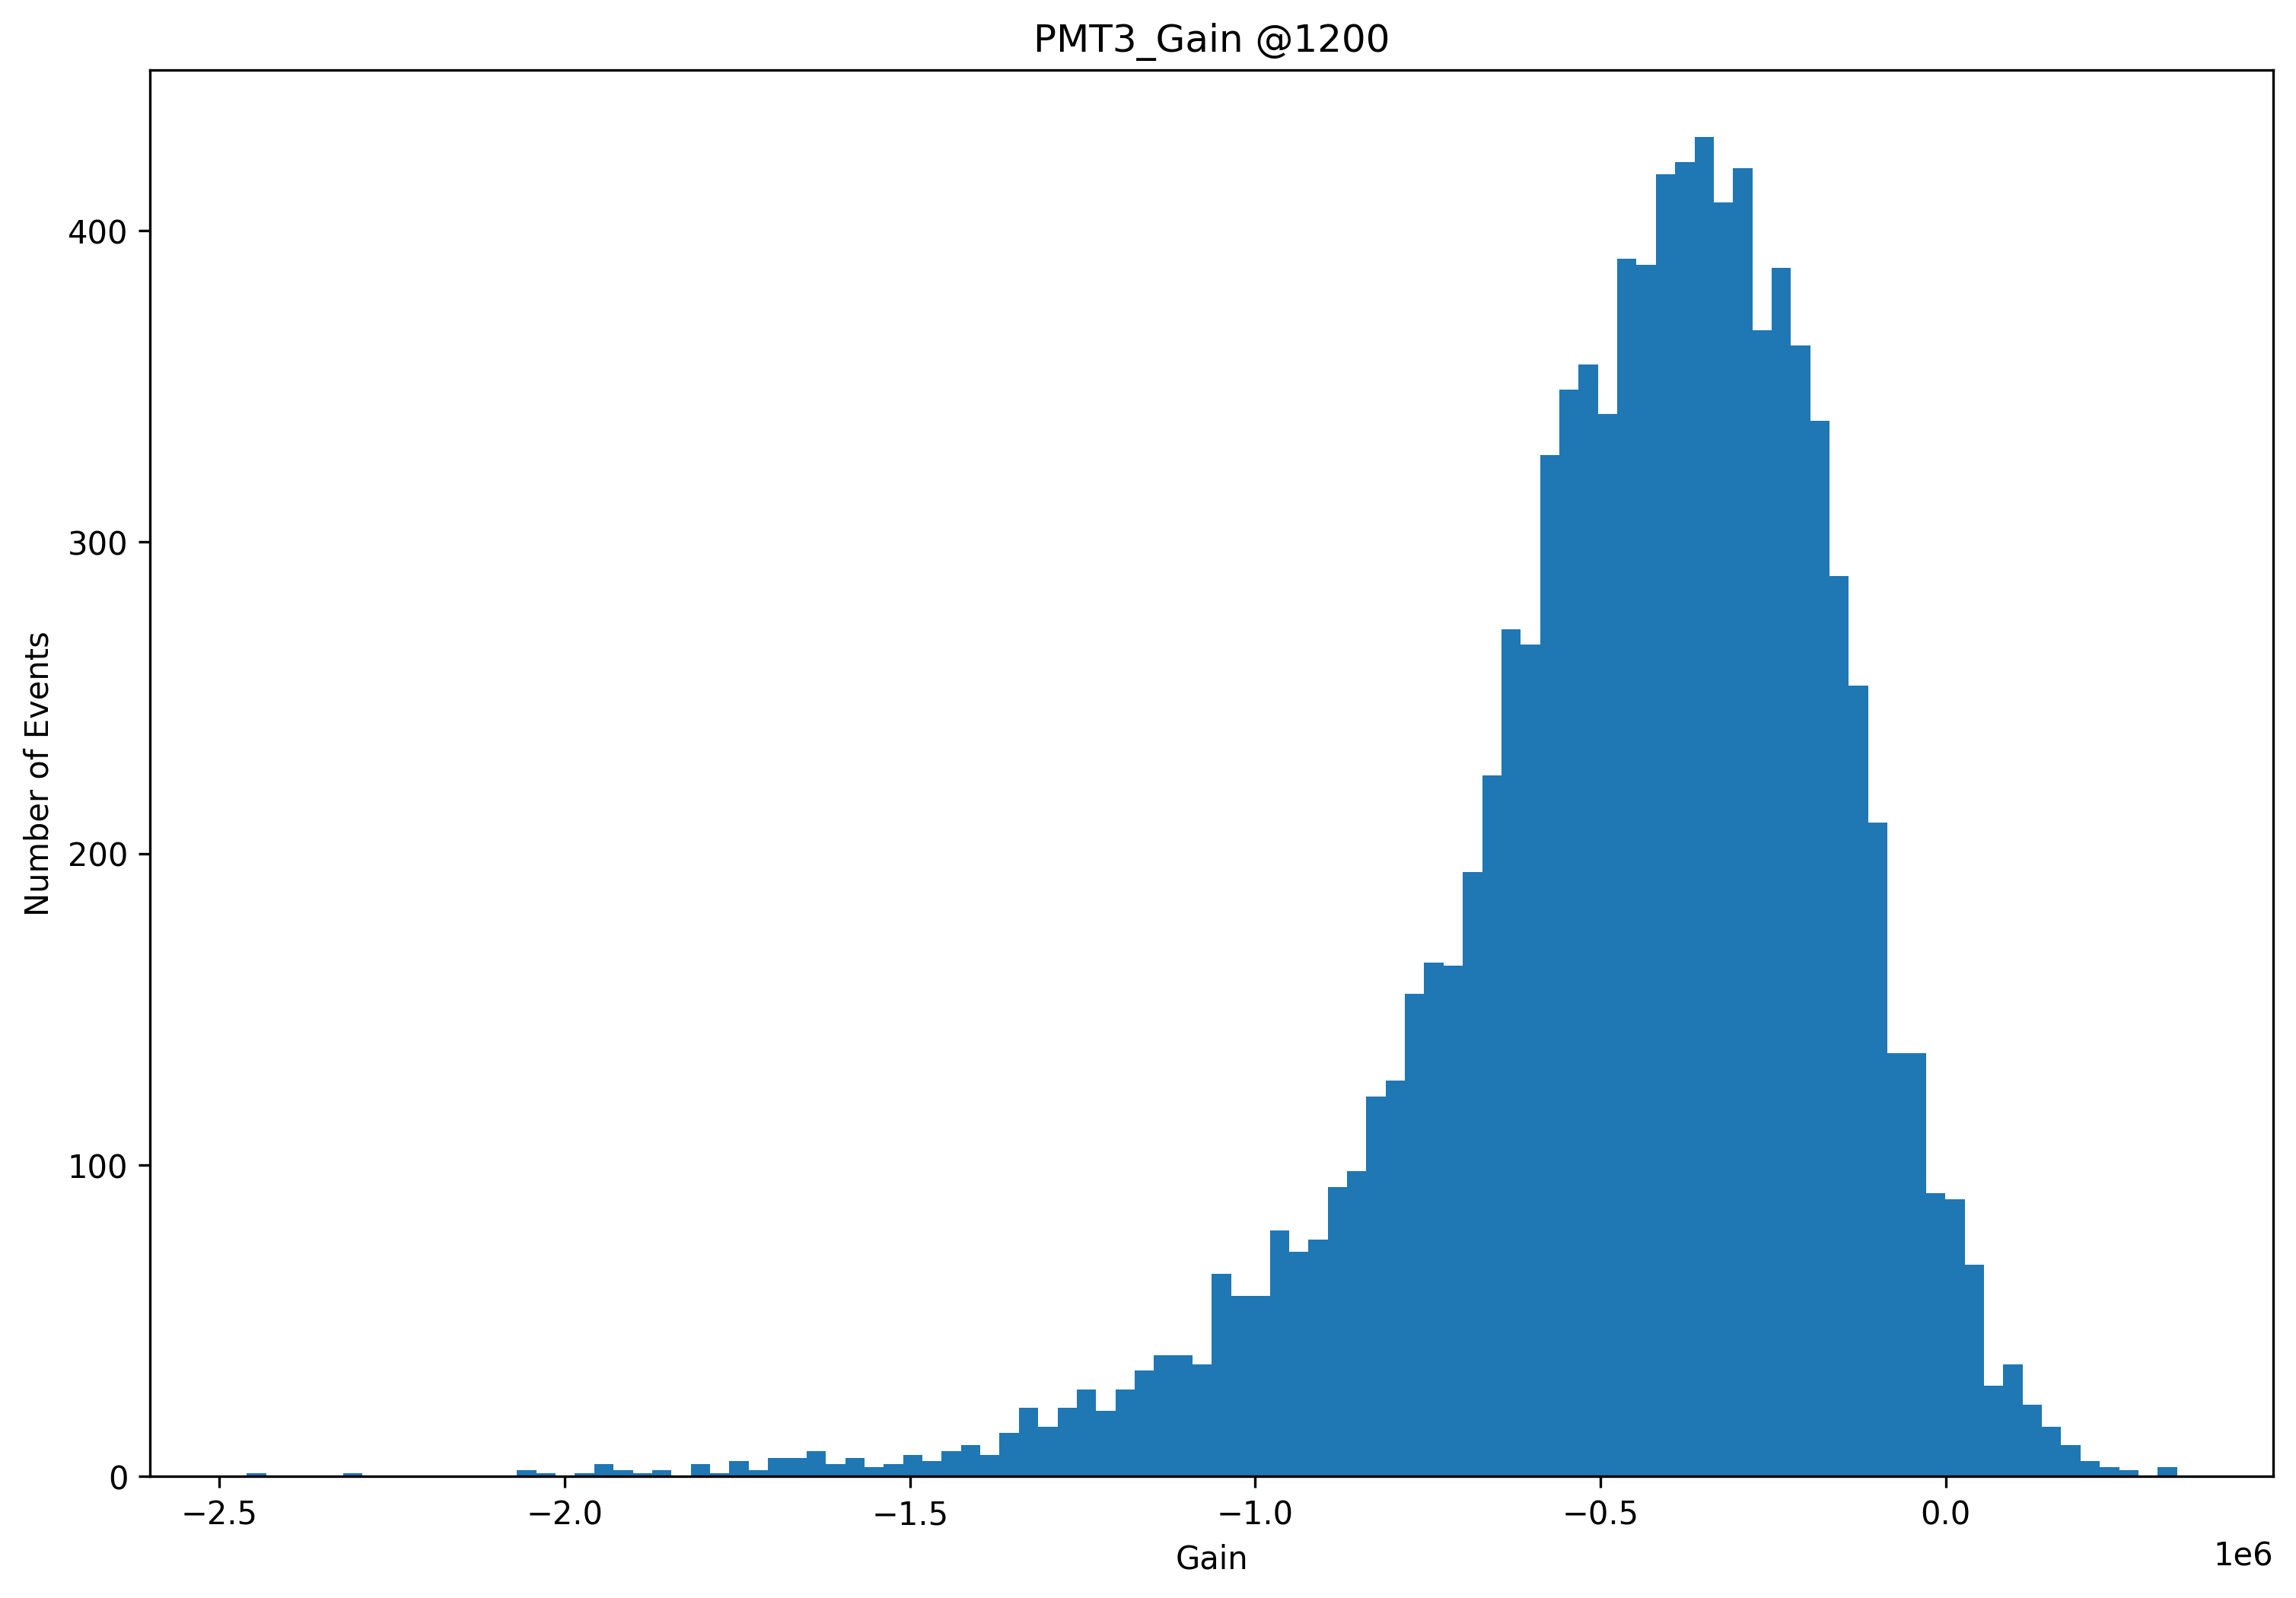

In [28]:
plt.figure(figsize=(12,8),dpi=300)
plt.title("PMT3_Gain @1200")
plt.ylabel("Number of Events")
plt.xlabel("Gain")
#plt.semilogx()
plt.hist(PMT3Gain[1],bins=100)
mean=st.mean(PMT3Gain[1])
stdev=st.stdev(PMT3Gain[1])
print(f"mean = {abs(mean)} stdev = {stdev}")